In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = list(range(7,16))
sex_ids = [2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [4]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [5]:
location_ids = (list(
                pd.read_csv(coverage_data_dir)
                .location_id
                .unique()))
location_ids

[161,
 201,
 202,
 205,
 171,
 179,
 163,
 11,
 180,
 184,
 15,
 164,
 214,
 165,
 196,
 190,
 189,
 20]

In [6]:
nutrient = 'iron'
vehicle = 'wheat flour'
effective_fractions = [1] * len(age_group_ids)

In [7]:
pd.read_csv(coverage_data_dir).sub_population.unique()

array(['total population', nan, 'women of reproductive age', 'under-5',
       '8-59 months', 'children 12-36 months',
       'households with children <2 years old'], dtype=object)

In [8]:
vehicles = ['wheat flour','maize flour']
sub_populations = ['women of reproductive age','total population',np.nan,'households with children <2 years old']

In [9]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     coverage_data_dir,
                                                     nutrient, 
                                                     vehicles,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['women of reproductive age','total population',np.nan,'households with children <2 years old'])

# HEMOGLOBIN

In [10]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [11]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
161,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
201,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
202,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
205,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
171,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [12]:
# NOTE:
# This approach currently does not consider that new coverage
# applies to those who are slightly more anemic
# than the overall population due to their lack
# of access to fortification

effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0  \
location_id sex_id age_group_id vehicle     year coverage_level             
11          2      7            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2            -0.021345   
                                                 0.5            -0.053361   
...                                                                   ...   
214         2      15           wheat flour 2024 0.5             0.215667   
                                                 0.8             0.345067   
                                            2025 0.2             0.086267   
                                                 0.5             0.215667   
                                                 0.8             0.345067   

                                                                   draw_1  \
location_id sex_id age_group_id vehicle     year coverage_level             
11          2      7            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2            -0.023012   
                                                 0.5            -0.057530   
...                                                                   ...   
214         2      15           wheat flour 2024 0.5             0.215620   
                                                 0.8             0.344993   
                                            2025 0.2             0.086248   
                                                 0.5             0.215620   
                                                 0.8             0.344993   

                                                                   draw_2  \
location_id sex_id age_group_id vehicle     year coverage_level             
11          2      7            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2            -0.023508   
                                                 0.5            -0.058770   
...                                                                   ...   
214         2      15           wheat flour 2024 0.5             0.215623   
                                                 0.8             0.344997   
                                            2025 0.2             0.086249   
                                                 0.5             0.215623   
                                                 0.8             0.344997   

                                                                   draw_3  \
location_id sex_id age_group_id vehicle     year coverage_level             
11          2      7            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2022 0.2            -0.023095   
                                                 0.5            -0.057739   
...                                                                   ...   
214         2      15           wheat flour 2024 0.5             0.215543   
                                                 0.8             0.344869   
                                            2025 0.2             0.086217   
                                                 0.5             0.215543   
                                                 0.8             0.344869   

                                                           

In [13]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('anemia_files_wra/mean_hgb_wra.csv')
mean_hgb = mean_hgb.reset_index().rename(columns={'year_id':'year'}).set_index(['location_id','vehicle','sex_id','age_group_id','coverage_level','year'])
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:121: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0  \
location_id vehicle     sex_id age_group_id coverage_level year                 
11          wheat flour 2      7            baseline       NaN     125.720458   
                               8            baseline       NaN     123.909047   
                               9            baseline       NaN     126.279327   
                               10           baseline       NaN     127.370087   
                               11           baseline       NaN     124.102796   
...                                                                       ...   
214         wheat flour 2      15           0.5            2024.0  125.482331   
                                            0.8            2024.0  126.216526   
                                            0.2            2025.0  124.748136   
                                            0.5            2025.0  125.482331   
                                            0.8            2025.0  126.216526   

                                                                       draw_1  \
location_id vehicle     sex_id age_group_id coverage_level year                 
11          wheat flour 2      7            baseline       NaN     125.013067   
                               8            baseline       NaN     124.923568   
                               9            baseline       NaN     129.756698   
                               10           baseline       NaN     123.591184   
                               11           baseline       NaN     128.072308   
...                                                                       ...   
214         wheat flour 2      15           0.5            2024.0  128.167054   
                                            0.8            2024.0  128.459829   
                                            0.2            2025.0  127.874279   
                                            0.5            2025.0  128.167054   
                                            0.8            2025.0  128.459829   

                                                                      draw_10  \
location_id vehicle     sex_id age_group_id coverage_level year                 
11          wheat flour 2      7            baseline       NaN     123.877956   
                               8            baseline       NaN     130.778339   
                               9            baseline       NaN     127.747059   
                               10           baseline       NaN     124.936974   
                               11           baseline       NaN     127.937545   
...                                                                       ...   
214         wheat flour 2      15           0.5            2024.0  123.309293   
                                            0.8            2024.0  123.569400   
                                            0.2            2025.0  123.049187   
                                            0.5            2025.0  123.309293   
                                            0.8            2025.0  123.569400   

                                                                     draw_100  \
location_id vehicle     sex_id age_group_id coverage_level year                 
11          wheat flour 2      7            baseline       NaN     131.046273   
                               8            baseline       NaN     125.834611   
                               9            baseline       NaN     126.493747   
                               10           baseline       NaN     127.437921   
                               11           baseline       NaN     125.883403   
...                                                                       ...   
214         wheat flour 2      15           0.5            2024.0  119.289585   
                                            0.8            2024.0  119.500873   
                                            0.2            2025.0  119.078296   
                  

In [14]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
hgb_sd = (hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index())
hgb_sd.to_csv('anemia_files_wra/sd_hgb_wra.csv')
hgb_sd.head()

,location_id,sex_id,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,11,2,7,13.292978,11.733902,12.935610,12.320549,14.694083,11.641884,11.431122,...,11.937170,14.399819,12.861581,13.566565,12.164301,13.666041,14.456370,12.005398,12.240155,14.472192
1,11,2,8,13.048941,12.197300,12.731180,15.277344,13.369539,14.518696,14.063543,...,12.613480,13.173946,11.281764,13.472578,13.443456,14.703646,11.525980,13.965222,13.907065,12.660112
2,11,2,9,12.543767,11.401418,12.888930,12.235923,13.494031,12.088787,12.987416,...,11.474242,13.854220,13.195765,12.937137,14.376137,13.119984,13.970816,12.079224,12.637997,13.366738
3,11,2,10,12.688434,12.885363,14.576534,11.692162,13.442872,12.988569,13.790864,...,12.558221,12.488462,12.442922,13.015538,11.233946,12.781795,12.458717,10.758250,12.619695,12.304094
4,11,2,11,13.946558,13.899470,14.838546,12.968994,11.884177,13.638474,12.981515,...,12.948337,12.461297,14.151997,15.132955,13.837780,16.155101,12.949827,14.163339,14.101253,13.043767


In [15]:
# get age-specific fertility rate
get_covariate_estimates(13, 
                               location_id=location_ids,
                               age_group_id=age_group_ids,
                               sex_id=sex_ids,
                               year_id=2019,
                               gbd_round_id=6,
                               decomp_step='step4').to_csv('anemia_files_wra/asfr.csv')


# get still birth to live birth ratio (not age-specific)
still = get_covariate_estimates(2267, 
                                location_id=location_ids,
                                year_id=2019,
                                gbd_round_id=6,
                                decomp_step='step4').to_csv('anemia_files_wra/still.csv')

In [16]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
#assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

In [17]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_wra/anemia_prev_wra.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','vehicle','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','vehicle','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia.sort_index() - counterfactual_anemia.sort_index()
averted_anemia

mild  \
location_id vehicle     age_group_id sex_id year draw     coverage_level             
11          maize flour 7            2      2021 draw_0   NaN                  NaN   
                                                 draw_1   NaN                  NaN   
                                                 draw_10  NaN                  NaN   
                                                 draw_100 NaN                  NaN   
                                                 draw_101 NaN                  NaN   
...                                                                            ...   
214         wheat flour 15           2      2025 draw_998 0.5             0.005605   
                                                          0.8             0.008958   
                                                 draw_999 0.2             0.001149   
                                                          0.5             0.002887   
                                                          0.8             0.004640   

                                                                          moderate  \
location_id vehicle     age_group_id sex_id year draw     coverage_level             
11          maize flour 7            2      2021 draw_0   NaN                  NaN   
                                                 draw_1   NaN                  NaN   
                                                 draw_10  NaN                  NaN   
                                                 draw_100 NaN                  NaN   
                                                 draw_101 NaN                  NaN   
...                                                                            ...   
214         wheat flour 15           2      2025 draw_998 0.5             0.005207   
                                                          0.8             0.008230   
                                                 draw_999 0.2             0.002478   
                                                          0.5             0.006160   
                                                          0.8             0.009800   

                                                                            severe  \
location_id vehicle     age_group_id sex_id year draw     coverage_level             
11          maize flour 7            2      2021 draw_0   NaN                  NaN   
                                                 draw_1   NaN                  NaN   
                                                 draw_10  NaN                  NaN   
                                                 draw_100 NaN                  NaN   
                                                 draw_101 NaN                  NaN   
...                                                                            ...   
214         wheat flour 15           2      2025 draw_998 0.5             0.000154   
                                                          0.8             0.000244   
                                                 draw_999 0.2             0.000211   
                                                          0.5             0.000522   
                                                          0.8             0.000825   

                                                                            anemic  \
location_id vehicle     age_group_id sex_id year draw     coverage_level             
11          maize flour 7            2      2021 draw_0   NaN                  NaN   
                                                 draw_1   NaN                  NaN   
                                                 draw_10  NaN                  NaN   
                                                 draw_100 NaN                  NaN   
                                                 draw_101 NaN                  NaN   
...                                                                            ...   
214         wheat flour 15       

In [18]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [19]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [20]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','vehicle','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_counts_averted.head()

draw                                               draw_0       draw_1  \
location_id vehicle     coverage_level year                              
11          wheat flour 0.2            2021      0.000000     0.000000   
                        0.5            2021      0.000000     0.000000   
                        0.8            2021      0.000000     0.000000   
                        0.2            2022  -8225.265414 -3262.087861   
                        0.5            2022 -20714.950266 -8182.922219   

draw                                             draw_10     draw_100  \
location_id vehicle     coverage_level year                             
11          wheat flour 0.2            2021     0.000000     0.000000   
                        0.5            2021     0.000000     0.000000   
                        0.8            2021     0.000000     0.000000   
                        0.2            2022 -2781.919510 -2223.233249   
                        0.5            2022 -6976.026285 -5571.062213   

draw                                             draw_101      draw_102  \
location_id vehicle     coverage_level year                               
11          wheat flour 0.2            2021      0.000000      0.000000   
                        0.5            2021      0.000000      0.000000   
                        0.8            2021      0.000000      0.000000   
                        0.2            2022  -4226.709042  -4493.404581   
                        0.5            2022 -10617.314323 -11290.804582   

draw                                            draw_103      draw_104  \
location_id vehicle     coverage_level year                              
11          wheat flour 0.2            2021     0.000000      0.000000   
                        0.5            2021     0.000000      0.000000   
                        0.8            2021     0.000000      0.000000   
                        0.2            2022  -897.133907  -5012.015535   
                        0.5            2022 -2245.046435 -12602.290235   

draw                                            draw_105      draw_106  ...  \
location_id vehicle     coverage_level year                             ...   
11          wheat flour 0.2            2021     0.000000      0.000000  ...   
                        0.5            2021     0.000000      0.000000  ...   
                        0.8            2021     0.000000      0.000000  ...   
                        0.2            2022 -3065.979177  -6945.257701  ...   
                        0.5            2022 -7689.701713 -17496.768919  ...   

draw                                            draw_990     draw_991  \
location_id vehicle     coverage_level year                             
11          wheat flour 0.2            2021     0.000000     0.000000   
                        0.5            2021     0.000000     0.000000   
                        0.8            2021     0.000000     0.000000   
                        0.2            2022 -3180.674316 -3229.744694   
                        0.5            2022 -7986.203454 -8101.667059   

draw                                             draw_992      draw_993  \
location_id vehicle     coverage_level year                               
11          wheat flour 0.2            2021      0.000000      0.000000   
                        0.5            2021      0.000000      0.000000   
                        0.8            2021      0.000000      0.000000   
                        0.2            2022  -5561.606565  -7217.307179   
                        0.5            2022 -13998.524105 -18187.510162   

draw                                            draw_994      draw_995  \
location_id vehicle     coverage_level year                              
11          wheat flour 0.2            2021     0.000000      0.000000   
                        0.5            2021     0.000000      0.000000   
                        0.8         

In [21]:
anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','vehicle','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                                            draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                  
11          wheat flour 0.2            2021   0.000000  0.000000  0.000000   
                        0.5            2021   0.000000  0.000000  0.000000   
                        0.8            2021   0.000000  0.000000  0.000000   
                        0.2            2022  -9.219770 -3.656502 -3.118277   
                        0.5            2022 -23.219563 -9.172307 -7.819487   

draw                                         draw_100   draw_101   draw_102  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021  0.000000   0.000000   0.000000   
                        0.5            2021  0.000000   0.000000   0.000000   
                        0.8            2021  0.000000   0.000000   0.000000   
                        0.2            2022 -2.492041  -4.737754  -5.036695   
                        0.5            2022 -6.244651 -11.901037 -12.655958   

draw                                         draw_103   draw_104  draw_105  \
location_id vehicle     coverage_level year                                  
11          wheat flour 0.2            2021  0.000000   0.000000  0.000000   
                        0.5            2021  0.000000   0.000000  0.000000   
                        0.8            2021  0.000000   0.000000  0.000000   
                        0.2            2022 -1.005605  -5.618011 -3.436682   
                        0.5            2022 -2.516492 -14.126014 -8.619452   

draw                                          draw_106  ...  draw_990  \
location_id vehicle     coverage_level year             ...             
11          wheat flour 0.2            2021   0.000000  ...  0.000000   
                        0.5            2021   0.000000  ...  0.000000   
                        0.8            2021   0.000000  ...  0.000000   
                        0.2            2022  -7.784998  ... -3.565245   
                        0.5            2022 -19.612276  ... -8.951803   

draw                                         draw_991   draw_992   draw_993  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021  0.000000   0.000000   0.000000   
                        0.5            2021  0.000000   0.000000   0.000000   
                        0.8            2021  0.000000   0.000000   0.000000   
                        0.2            2022 -3.620248  -6.234052  -8.089941   
                        0.5            2022 -9.081227 -15.691064 -20.386534   

draw                                         draw_994   draw_995   draw_996  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021  0.000000   0.000000   0.000000   
                        0.5            2021  0.000000   0.000000   0.000000   
                        0.8            2021  0.000000   0.000000   0.000000   
                        0.2            2022 -2.541023  -4.505690  -5.879317   
                        0.5            2022 -6.368167 -11.312254 -14.773471   

draw                                         draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000  
                        0.5            2021  0.000000  0.000000  0.000000  
                        0.8            2021  0.000000  0.000000  0.000000  
                        0.2            2022 -2.997631 -2.282619 -2.555747  
                        0.5            2022 -7.519015 -5.722080 -6.403580  

[5 rows x 1000 columns]

In [22]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
11,809.742321,682.380657,540.657010,713.507046,535.650523,614.637011,691.887717,527.329779,740.871339,464.686349,...,457.670248,691.152648,581.092441,569.453589,621.514402,653.395784,355.674448,468.554738,437.401744,573.793518
15,1165.677602,1024.724016,798.548094,1125.979673,850.254048,1036.408959,1026.833363,851.020927,1114.407576,700.764019,...,860.833218,1035.594794,1032.030641,856.656757,916.625132,1076.488273,511.788271,728.085922,769.820640,904.507905
20,367.290472,368.594553,306.299292,333.001772,305.650688,294.254884,303.917782,253.653451,374.208848,251.087895,...,289.525941,376.053908,257.793100,244.783757,318.369979,370.470222,140.774655,284.897535,239.583945,223.643206
161,815.373354,757.259280,633.009214,756.366688,616.591860,660.079125,788.492728,645.117877,738.218553,511.467067,...,650.579609,729.907661,712.948787,506.126551,708.556881,629.241746,336.382230,542.628894,620.173775,494.706553
163,1648.044374,1527.160131,1265.674924,1554.341027,1286.920146,1459.132145,1617.330958,1238.704420,1639.631445,1022.995656,...,1246.385955,1520.507539,1505.262585,1368.586206,1400.305859,1496.696733,728.304694,1181.105742,1171.923801,1147.538967


In [23]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=age_group_ids,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
11           3           192       0.961034
15           3           192       0.916792
20           3           192       1.078846
161          3           192       0.796116
163          3           192       0.799578
164          3           192       0.940607
165          3           192       0.857264
171          3           192       0.582179
179          3           192       0.828381
180          3           192       0.608740
184          3           192       0.530953
189          3           192       0.677578
190          3           192       0.485159
196          3           192       0.705113
201          3           192       0.572733
202          3           192       0.623709
205          3           192       0.531386
214          3           192       0.681668
dtype: float64

In [24]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                                           draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -1.138605 -0.535845 -0.576757   
                        0.5            2022 -2.867525 -1.344163 -1.446293   

draw                                         draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.349266 -0.884486 -0.819458   
                        0.5            2022 -0.875205 -2.221791 -2.059095   

draw                                         draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.145342 -1.065369 -0.463870   
                        0.5            2022 -0.363714 -2.678782 -1.163421   

draw                                         draw_106  ...  draw_990  \
location_id vehicle     coverage_level year            ...             
11          wheat flour 0.2            2021  0.000000  ...  0.000000   
                        0.5            2021  0.000000  ...  0.000000   
                        0.8            2021  0.000000  ...  0.000000   
                        0.2            2022 -1.675323  ... -0.778999   
                        0.5            2022 -4.220541  ... -1.955950   

draw                                         draw_991  draw_992  draw_993  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.523799 -1.072816 -1.420650   
                        0.5            2022 -1.313925 -2.700270 -3.580017   

draw                                         draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                        0.5            2021  0.000000  0.000000  0.000000   
                        0.8            2021  0.000000  0.000000  0.000000   
                        0.2            2022 -0.408844 -0.689581 -1.653005   
                        0.5            2022 -1.024621 -1.731302 -4.153650   

draw                                         draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000  
                        0.5            2021  0.000000  0.000000  0.000000  
                        0.8            2021  0.000000  0.000000  0.000000  
                        0.2            2022 -0.639761 -0.521859 -0.445412  
                        0.5            2022 -1.604725 -1.308198 -1.116008  

[5 rows x 1000 columns]

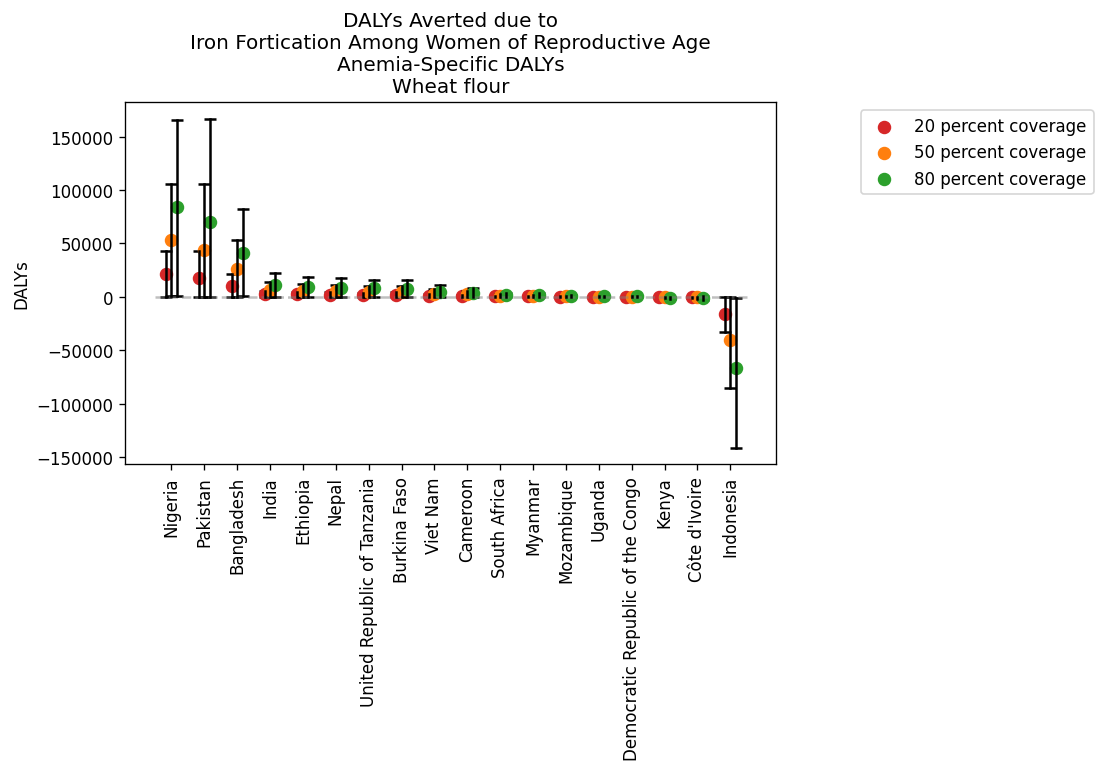

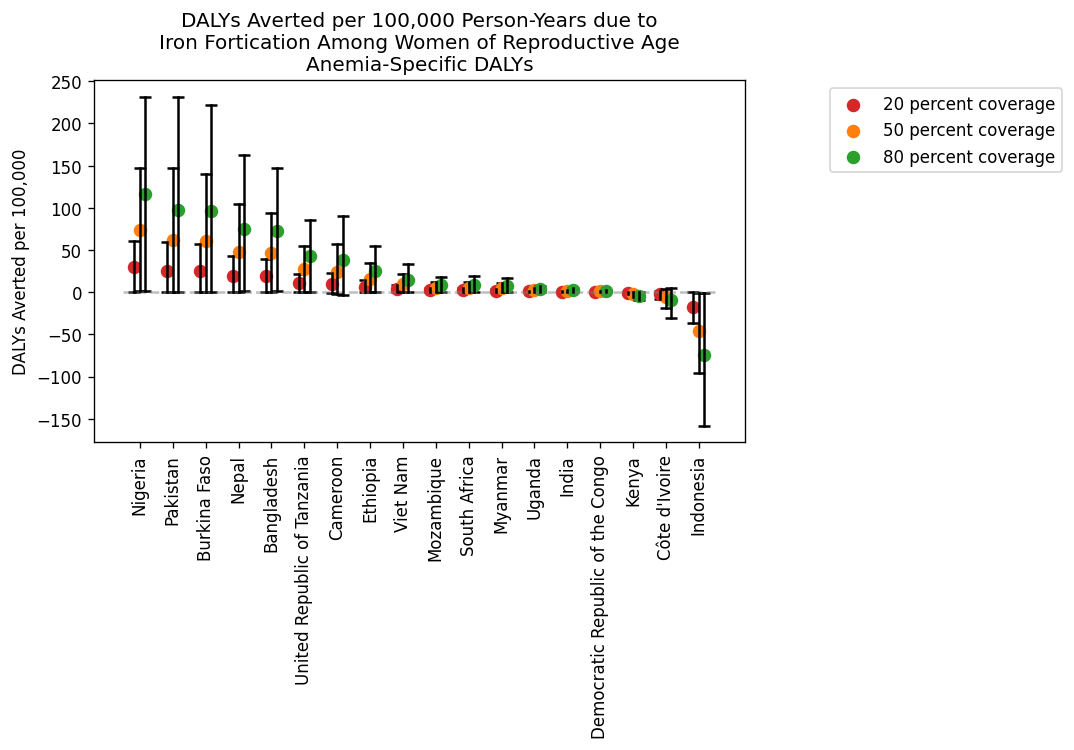

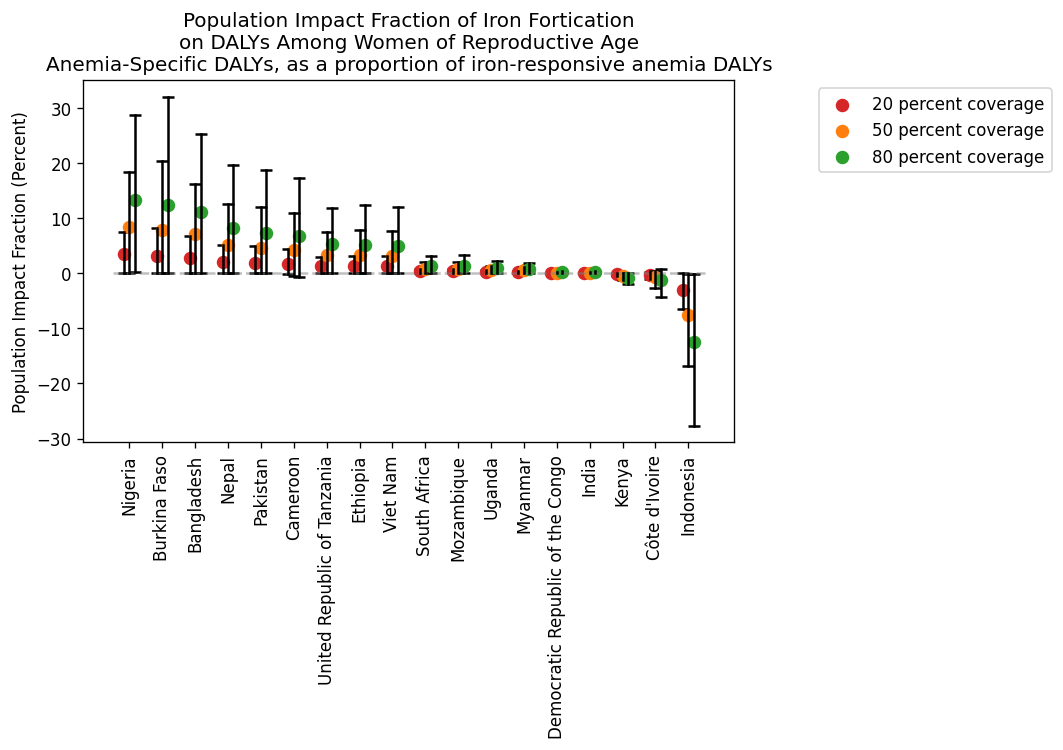

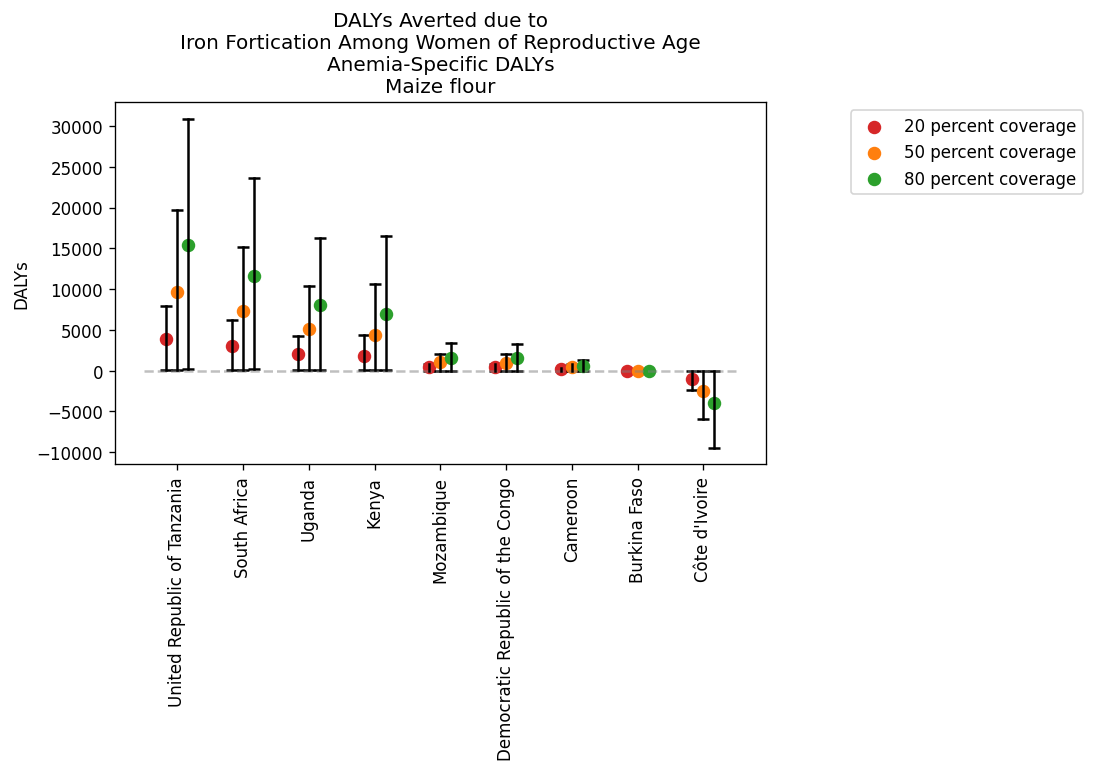

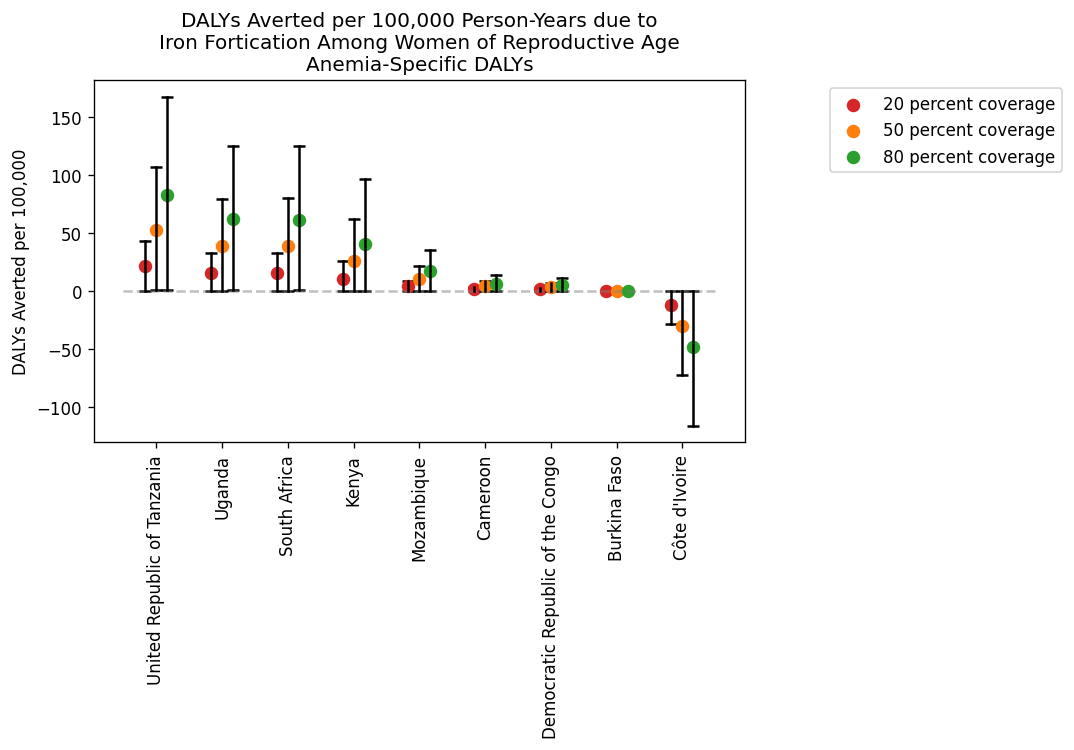

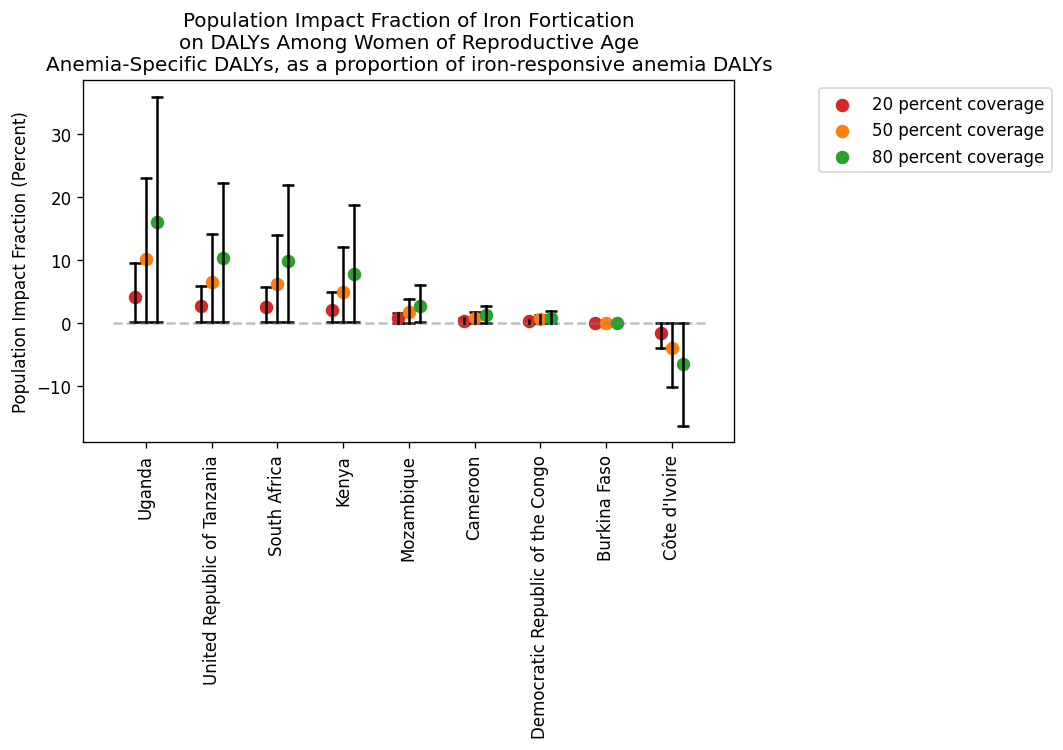

In [25]:
for vehicle in vehicles:
    make_dot_plots(
    (anemia_counts_averted.reset_index()
     .loc[anemia_counts_averted.reset_index().vehicle==vehicle]
     .set_index(['location_id','coverage_level','year'])
     .drop(columns='vehicle')), 
    'Iron', 
    'counts', 
    coverage_levels, f'Anemia-Specific DALYs\n{vehicle.capitalize()}', 
    f'iron_wra_anemia_counts_averted_{vehicle}', True)
    
    make_dot_plots(
    (anemia_rates_averted.reset_index()
     .loc[anemia_rates_averted.reset_index().vehicle==vehicle]
     .set_index(['location_id','coverage_level','year'])
     .drop(columns='vehicle')), 
    'Iron', 
    'rates', 
    coverage_levels, 'Anemia-Specific DALYs', 
    f'iron_wra_anemia_rates_averted_{vehicle}', True)

    make_dot_plots(
    (anemia_pifs.reset_index()
     .loc[anemia_pifs.reset_index().vehicle==vehicle]
     .set_index(['location_id','coverage_level','year'])
     .drop(columns='vehicle')), 
    'Iron', 
    'pifs', 
    coverage_levels, 'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs', 
    f'iron_wra_anemia_pif_{vehicle}', True)

# MATERNAL DISORDERS

In [26]:
rr = get_draws('rei_id',
                 95,
                 source='rr',
                 location_id=location_ids,
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 gbd_round_id=6,
                 decomp_step='step4'
                 )
rr = rr.loc[rr.cause_id==367].set_index(['sex_id','age_group_id'])
rr = rr.drop(columns=[c for c in rr.columns if 'draw' not in c])
rr

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v107/lib/python3.7/site-packages/get_draws/sources/rr.py:256: UserWarning: RRs draws returned for rei_id = 95 have location_id(s) = 1 where 161, 201, 202, 205, 171, 179, 163, 11, 180, 184, 15, 164, 214, 165, 196, 190, 189, 20 were requested.
  ", ".join(str(hf) for hf in hdf_filters['location_id'])


draw_0    draw_1    draw_2    draw_3    draw_4  \
sex_id age_group_id                                                     
2      8             1.212408  1.350076  1.086644  1.219068  1.261495   
       13            1.212408  1.350076  1.086644  1.219068  1.261495   
       11            1.212408  1.350076  1.086644  1.219068  1.261495   
       10            1.212408  1.350076  1.086644  1.219068  1.261495   
       9             1.212408  1.350076  1.086644  1.219068  1.261495   
       12            1.212408  1.350076  1.086644  1.219068  1.261495   
       14            1.212408  1.350076  1.086644  1.219068  1.261495   
       7             1.212408  1.350076  1.086644  1.219068  1.261495   
       15            1.212408  1.350076  1.086644  1.219068  1.261495   

                       draw_5    draw_6    draw_7   draw_8    draw_9  ...  \
sex_id age_group_id                                                   ...   
2      8             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       13            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       11            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       10            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       9             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       12            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       14            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       7             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       15            1.286287  1.092801  1.212885  1.19206  1.194871  ...   

                     draw_990  draw_991  draw_992  draw_993  draw_994  \
sex_id age_group_id                                                     
2      8             1.189681  1.315712   1.28604  1.257695  1.216908   
       13            1.189681  1.315712   1.28604  1.257695  1.216908   
       11            1.189681  1.315712   1.28604  1.257695  1.216908   
       10            1.189681  1.315712   1.28604  1.257695  1.216908   
       9             1.189681  1.315712   1.28604  1.257695  1.216908   
       12            1.189681  1.315712   1.28604  1.257695  1.216908   
       14            1.189681  1.315712   1.28604  1.257695  1.216908   
       7             1.189681  1.315712   1.28604  1.257695  1.216908   
       15            1.189681  1.315712   1.28604  1.257695  1.216908   

                     draw_995  draw_996  draw_997  draw_998  draw_999  
sex_id age_group_id                                                    
2      8             1.177559  1.315347  1.221176  1.276526  1.243538  
       13            1.177559  1.315347  1.221176  1.276526  1.243538  
       11            1.177559  1.315347  1.221176  1.276526  1.243538  
       10            1.177559  1.315347  1.221176  1.276526  1.243538  
       9             1.177559  1.315347  1.221176  1.276526  1.243538  
       12            1.177559  1.315347  1.221176  1.276526  1.243538  
       14            1.177559  1.315347  1.221176  1.276526  1.243538  
       7             1.177559  1.315347  1.221176  1.276526  1.243538  
       15            1.177559  1.315347  1.221176  1.276526  1.243538  

[9 rows x 1000 columns]

In [27]:
baseline_hgb = get_draws('modelable_entity_id',
                    10487,
                    source='epi',
                    location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    year_id=2019,
                    gbd_round_id=6,
                    decomp_step='step4',
                    status='best')
baseline_hgb = baseline_hgb.set_index(['location_id','sex_id','age_group_id'])
baseline_hgb = baseline_hgb.drop(columns=[c for c in baseline_hgb.columns if 'draw' not in c])
baseline_hgb.head()

draw_0      draw_1     draw_10  \
location_id sex_id age_group_id                                       
11          2      7             125.720458  125.013067  123.877956   
                   8             123.909047  124.923568  130.778339   
                   9             126.279327  129.756698  127.747059   
                   10            127.370087  123.591184  124.936974   
                   11            124.102796  128.072308  127.937545   

                                   draw_100    draw_101    draw_102  \
location_id sex_id age_group_id                                       
11          2      7             131.046273  126.535151  126.539773   
                   8             125.834611  124.179762  131.425035   
                   9             126.493747  127.871689  126.866193   
                   10            127.437921  127.871399  126.539961   
                   11            125.883403  125.754281  125.336822   

                                   draw_103    draw_104    draw_105  \
location_id sex_id age_group_id                                       
11          2      7             128.910306  130.213900  124.539656   
                   8             130.662542  130.573890  124.279944   
                   9             125.532345  127.220828  127.520039   
                   10            128.011740  129.364461  125.843733   
                   11            131.052587  124.180565  130.917344   

                                   draw_106  ...    draw_990    draw_991  \
location_id sex_id age_group_id              ...                           
11          2      7             126.966239  ...  127.598859  128.639075   
                   8             130.325987  ...  129.610821  126.145738   
                   9             125.757247  ...  128.830036  129.892692   
                   10            129.093740  ...  127.874589  126.383536   
                   11            124.230008  ...  125.236726  126.314923   

                                   draw_992    draw_993    draw_994  \
location_id sex_id age_group_id                                       
11          2      7             127.495184  126.026349  126.802325   
                   8             131.445379  125.873082  128.667313   
                   9             129.194790  128.552509  128.126533   
                   10            125.760543  127.463698  128.855356   
                   11            126.743300  127.318785  133.116473   

                                   draw_995    draw_996    draw_997  \
location_id sex_id age_group_id                                       
11          2      7             123.832785  125.791511  126.368115   
                   8             125.066203  132.511309  127.834327   
                   9             125.604651  131.079342  131.531884   
                   10            130.627663  122.278558  124.942197   
                   11            129.348699  126.391037  126.928617   

                                   draw_998    draw_999  
location_id sex_id age_group_id                          
11          2      7             128.945972  125.442573  
                   8             131.196175  130.157132  
                   9             126.830442  130.693367  
                   10            130.590653  132.024848  
                   11            127.330763  124.853824  

[5 rows x 1000 columns]

In [28]:
hgb_diff = (((mean_hgb - baseline_hgb) / 10)
            .reset_index()
            .set_index(['sex_id','age_group_id','location_id','vehicle','coverage_level','year']))
hgb_diff.head()

draw_0  \
sex_id age_group_id location_id vehicle     coverage_level year             
2      7            11          wheat flour baseline       NaN        0.0   
                                maize flour baseline       NaN        0.0   
                                wheat flour 0.2            2021.0     0.0   
                                            0.5            2021.0     0.0   
                                            0.8            2021.0     0.0   

                                                                   draw_1  \
sex_id age_group_id location_id vehicle     coverage_level year             
2      7            11          wheat flour baseline       NaN        0.0   
                                maize flour baseline       NaN        0.0   
                                wheat flour 0.2            2021.0     0.0   
                                            0.5            2021.0     0.0   
                                            0.8            2021.0     0.0   

                                                                   draw_10  \
sex_id age_group_id location_id vehicle     coverage_level year              
2      7            11          wheat flour baseline       NaN         0.0   
                                maize flour baseline       NaN         0.0   
                                wheat flour 0.2            2021.0      0.0   
                                            0.5            2021.0      0.0   
                                            0.8            2021.0      0.0   

                                                                   draw_100  \
sex_id age_group_id location_id vehicle     coverage_level year               
2      7            11          wheat flour baseline       NaN          0.0   
                                maize flour baseline       NaN          0.0   
                                wheat flour 0.2            2021.0       0.0   
                                            0.5            2021.0       0.0   
                                            0.8            2021.0       0.0   

                                                                   draw_101  \
sex_id age_group_id location_id vehicle     coverage_level year               
2      7            11          wheat flour baseline       NaN          0.0   
                                maize flour baseline       NaN          0.0   
                                wheat flour 0.2            2021.0       0.0   
                                            0.5            2021.0       0.0   
                                            0.8            2021.0       0.0   

                                                                   draw_102  \
sex_id age_group_id location_id vehicle     coverage_level year               
2      7            11          wheat flour baseline       NaN          0.0   
                                maize flour baseline       NaN          0.0   
                                wheat flour 0.2            2021.0       0.0   
                                            0.5            2021.0       0.0   
                                            0.8            2021.0       0.0   

                                                                   draw_103  \
sex_id age_group_id location_id vehicle     coverage_level year               
2      7            11          wheat flour baseline       NaN          0.0   
                                maize flour baseline       NaN          0.0   
                                wheat flour 0.2            2021.0       0.0   
                                            0.5            2021.0       0.0   
                                            0.8            2021.0       0.0   

                                                                   draw_104  \
sex_id age_group_id location_id vehicle     coverage_level year               
2      7            11          wheat flour baseline       NaN    

In [29]:
import math
frac_reduction = ((1 / math.e ** (np.log(rr) * hgb_diff))
                  .reset_index()
                  .set_index(['location_id','sex_id','age_group_id','vehicle','coverage_level','year']))
frac_reduction.head()

draw_0  \
location_id sex_id age_group_id vehicle     coverage_level year             
11          2      7            wheat flour baseline       NaN        1.0   
                                maize flour baseline       NaN        1.0   
                                wheat flour 0.2            2021.0     1.0   
                                            0.5            2021.0     1.0   
                                            0.8            2021.0     1.0   

                                                                   draw_1  \
location_id sex_id age_group_id vehicle     coverage_level year             
11          2      7            wheat flour baseline       NaN        1.0   
                                maize flour baseline       NaN        1.0   
                                wheat flour 0.2            2021.0     1.0   
                                            0.5            2021.0     1.0   
                                            0.8            2021.0     1.0   

                                                                   draw_10  \
location_id sex_id age_group_id vehicle     coverage_level year              
11          2      7            wheat flour baseline       NaN         1.0   
                                maize flour baseline       NaN         1.0   
                                wheat flour 0.2            2021.0      1.0   
                                            0.5            2021.0      1.0   
                                            0.8            2021.0      1.0   

                                                                   draw_100  \
location_id sex_id age_group_id vehicle     coverage_level year               
11          2      7            wheat flour baseline       NaN          1.0   
                                maize flour baseline       NaN          1.0   
                                wheat flour 0.2            2021.0       1.0   
                                            0.5            2021.0       1.0   
                                            0.8            2021.0       1.0   

                                                                   draw_101  \
location_id sex_id age_group_id vehicle     coverage_level year               
11          2      7            wheat flour baseline       NaN          1.0   
                                maize flour baseline       NaN          1.0   
                                wheat flour 0.2            2021.0       1.0   
                                            0.5            2021.0       1.0   
                                            0.8            2021.0       1.0   

                                                                   draw_102  \
location_id sex_id age_group_id vehicle     coverage_level year               
11          2      7            wheat flour baseline       NaN          1.0   
                                maize flour baseline       NaN          1.0   
                                wheat flour 0.2            2021.0       1.0   
                                            0.5            2021.0       1.0   
                                            0.8            2021.0       1.0   

                                                                   draw_103  \
location_id sex_id age_group_id vehicle     coverage_level year               
11          2      7            wheat flour baseline       NaN          1.0   
                                maize flour baseline       NaN          1.0   
                                wheat flour 0.2            2021.0       1.0   
                                            0.5            2021.0       1.0   
                                            0.8            2021.0       1.0   

                                                                   draw_104  \
location_id sex_id age_group_id vehicle     coverage_level year               
11          2      7            wheat flour baseline       NaN    

In [30]:
maternal_ylds = get_draws('cause_id',
                367,
                source='como',
                location_id=location_ids,
                age_group_id=age_group_ids,
                measure_id=3, #ylds
                metric_id=3, #rate
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step5')
pop = get_population(location_id=location_ids,
                    sex_id=sex_ids,
                    age_group_id=age_group_ids,
                    gbd_round_id=6,
                    decomp_step='step4')
maternal_ylds = maternal_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    maternal_ylds[f'draw_{i}'] = maternal_ylds[f'draw_{i}'] * maternal_ylds['population']

maternal_ylds = maternal_ylds.set_index(['location_id','sex_id','age_group_id'])
maternal_ylds = maternal_ylds.drop(columns=[c for c in maternal_ylds.columns if 'draw' not in c])
maternal_ylds.head()

draw_0       draw_1      draw_10  \
location_id sex_id age_group_id                                          
11          2      7                3.586432     4.998050     3.445164   
                   8              585.737491   585.426156   491.528819   
                   9             1922.505580  1276.277180  1917.771792   
                   10            4060.989508  4025.468974  4192.070797   
                   11            4455.327358  3118.082544  3211.384518   

                                    draw_100     draw_101     draw_102  \
location_id sex_id age_group_id                                          
11          2      7                2.116180     2.344429     1.962343   
                   8              528.633002   452.269796   430.703978   
                   9             1740.962970  2239.173970  1613.572678   
                   10            4131.366644  4668.040857  4016.559428   
                   11            4115.780991  3081.222415  3658.435750   

                                    draw_103     draw_104     draw_105  \
location_id sex_id age_group_id                                          
11          2      7                2.024419     2.148836     5.864235   
                   8              459.285431   491.153859   760.852711   
                   9             2040.319616  1924.962518  1333.200821   
                   10            4433.866685  3314.553836  4079.742520   
                   11            2917.687330  2962.917146  3668.764115   

                                    draw_106  ...     draw_990     draw_991  \
location_id sex_id age_group_id               ...                             
11          2      7                1.384865  ...     3.034912     4.170687   
                   8              271.857649  ...   494.872637  1021.817513   
                   9             1161.819940  ...  1439.148492  3564.418236   
                   10            2832.033212  ...  3605.415130  3914.302468   
                   11            2678.979705  ...  2823.482936  2935.157893   

                                    draw_992     draw_993     draw_994  \
location_id sex_id age_group_id                                          
11          2      7                3.349819     2.861947     2.151309   
                   8              460.191849   593.479878   463.517862   
                   9             2162.130717  1910.494790  2328.013999   
                   10            3547.129545  2637.807829  3262.049063   
                   11            3311.509870  2782.787451  3235.297050   

                                    draw_995     draw_996     draw_997  \
location_id sex_id age_group_id                                          
11          2      7                3.770873     1.982540     2.928532   
                   8              621.126836   189.985218   618.708213   
                   9             1893.261671  1009.037569  1664.215066   
                   10            3877.918388  2138.601526  2846.766586   
                   11            4177.115755  1481.247044  2691.780737   

                                    draw_998     draw_999  
location_id sex_id age_group_id                            
11          2      7                2.121362     2.643029  
                   8              301.103977   302.589682  
                   9             1180.678435  1297.549184  
                   10            2840.064448  2267.987208  
                   11            3238.916812  3085.059741  

[5 rows x 1000 columns]

In [31]:
maternal_ylls = get_draws('cause_id',
                367,
                source='codcorrect',
                location_id=location_ids,
                age_group_id=age_group_ids,
                measure_id=4,
                metric_id=1,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step5',
                status='latest')

maternal_ylls = maternal_ylls.set_index(['location_id','sex_id','age_group_id'])
maternal_ylls = maternal_ylls.drop(columns=[c for c in maternal_ylls.columns if 'draw' not in c])
maternal_ylls.head()

draw_0        draw_1       draw_10  \
location_id sex_id age_group_id                                             
11          2      7               675.402102    576.379372    851.124053   
                   8             17035.059448  10267.173550  11733.353193   
                   9             17106.940174  21064.130315  27093.440891   
                   10            27529.648730  18090.108355  25961.112723   
                   11            19693.763706  18457.835506  21981.038867   

                                     draw_100      draw_101      draw_102  \
location_id sex_id age_group_id                                             
11          2      7               486.538016    889.418333    551.659538   
                   8             12122.816532  17403.603694  12930.613203   
                   9             21927.797991  17009.881472  23397.324135   
                   10            19800.344100  20680.135052  22574.962807   
                   11            20389.021204  18302.948716  16748.808596   

                                     draw_103      draw_104      draw_105  \
location_id sex_id age_group_id                                             
11          2      7               615.710799    627.343427    624.991833   
                   8             14887.891892  10069.628672  12324.197887   
                   9             21598.236991  17174.517221  17982.661058   
                   10            15412.396600  11020.159270  23203.427202   
                   11            19062.819906  12802.212035  20691.140082   

                                     draw_106  ...      draw_990  \
location_id sex_id age_group_id                ...                 
11          2      7               691.792727  ...    380.705751   
                   8             18833.933931  ...  11551.797249   
                   9             22898.693773  ...  15732.960230   
                   10            18208.801935  ...  14247.158825   
                   11            27108.162649  ...  15675.043762   

                                     draw_991      draw_992      draw_993  \
location_id sex_id age_group_id                                             
11          2      7               708.622357    832.972619    557.511990   
                   8             13423.341485  15491.393755  13212.484313   
                   9             23153.955959  23991.776401  21178.278535   
                   10            20366.550781  23152.770207  15508.642945   
                   11            24834.778001  36310.402370  17662.119971   

                                     draw_994      draw_995      draw_996  \
location_id sex_id age_group_id                                             
11          2      7               770.748074    872.983215    620.485120   
                   8             15080.320312  13475.627776  14279.332341   
                   9             24916.795059  16307.667557  23091.716613   
                   10            36355.918759  19408.068056  30866.682918   
                   11            33861.664309  27735.686668  29317.248900   

                                     draw_997      draw_998      draw_999  
location_id sex_id age_group_id                                            
11          2      7               782.854251    747.291351    695.196266  
                   8             12581.398051  14248.173475  15389.637181  
                   9             27949.115225  24137.241881  28621.722688  
                   10            19005.360367  33206.852789  26453.907884  
                   11            26024.570876  28912.464753  37564.705147  

[5 rows x 1000 columns]

In [32]:
maternal_dalys = maternal_ylds + maternal_ylls
maternal_dalys.head()

draw_0        draw_1       draw_10  \
location_id sex_id age_group_id                                             
11          2      7               678.988534    581.377422    854.569217   
                   8             17620.796939  10852.599706  12224.882012   
                   9             19029.445754  22340.407495  29011.212683   
                   10            31590.638238  22115.577329  30153.183521   
                   11            24149.091064  21575.918050  25192.423385   

                                     draw_100      draw_101      draw_102  \
location_id sex_id age_group_id                                             
11          2      7               488.654195    891.762761    553.621881   
                   8             12651.449534  17855.873491  13361.317181   
                   9             23668.760961  19249.055441  25010.896813   
                   10            23931.710744  25348.175909  26591.522235   
                   11            24504.802195  21384.171131  20407.244345   

                                     draw_103      draw_104      draw_105  \
location_id sex_id age_group_id                                             
11          2      7               617.735218    629.492263    630.856068   
                   8             15347.177322  10560.782531  13085.050598   
                   9             23638.556607  19099.479739  19315.861879   
                   10            19846.263285  14334.713106  27283.169723   
                   11            21980.507236  15765.129181  24359.904198   

                                     draw_106  ...      draw_990  \
location_id sex_id age_group_id                ...                 
11          2      7               693.177592  ...    383.740663   
                   8             19105.791580  ...  12046.669885   
                   9             24060.513713  ...  17172.108721   
                   10            21040.835147  ...  17852.573954   
                   11            29787.142354  ...  18498.526697   

                                     draw_991      draw_992      draw_993  \
location_id sex_id age_group_id                                             
11          2      7               712.793044    836.322439    560.373938   
                   8             14445.158998  15951.585604  13805.964192   
                   9             26718.374195  26153.907117  23088.773325   
                   10            24280.853249  26699.899753  18146.450774   
                   11            27769.935893  39621.912240  20444.907422   

                                     draw_994      draw_995      draw_996  \
location_id sex_id age_group_id                                             
11          2      7               772.899383    876.754088    622.467660   
                   8             15543.838174  14096.754612  14469.317559   
                   9             27244.809058  18200.929228  24100.754182   
                   10            39617.967821  23285.986444  33005.284444   
                   11            37096.961359  31912.802423  30798.495945   

                                     draw_997      draw_998      draw_999  
location_id sex_id age_group_id                                            
11          2      7               785.782783    749.412713    697.839296  
                   8             13200.106264  14549.277451  15692.226863  
                   9             29613.330291  25317.920316  29919.271872  
                   10            21852.126953  36046.917237  28721.895092  
                   11            28716.351612  32151.381564  40649.764887  

[5 rows x 1000 columns]

In [33]:
counterfactual_maternal_dalys = maternal_dalys * frac_reduction
counterfactual_maternal_dalys = (counterfactual_maternal_dalys.groupby(['location_id','vehicle','coverage_level','year']).sum())
maternal_counts_averted = maternal_dalys.groupby('location_id').sum() - counterfactual_maternal_dalys
maternal_counts_averted.head()

draw_0      draw_1  \
location_id vehicle     coverage_level year                              
11          wheat flour 0.2            2021.0     0.000000    0.000000   
                                       2022.0  -322.332497 -174.748324   
                                       2023.0 -1293.853525 -700.635243   
                                       2024.0 -1293.853525 -700.635243   
                                       2025.0 -1293.853525 -700.635243   

                                                  draw_10    draw_100  \
location_id vehicle     coverage_level year                             
11          wheat flour 0.2            2021.0    0.000000    0.000000   
                                       2022.0 -193.722127 -143.106932   
                                       2023.0 -776.482609 -573.429068   
                                       2024.0 -776.482609 -573.429068   
                                       2025.0 -776.482609 -573.429068   

                                                 draw_101     draw_102  \
location_id vehicle     coverage_level year                              
11          wheat flour 0.2            2021.0    0.000000     0.000000   
                                       2022.0 -161.617887  -301.871386   
                                       2023.0 -647.734896 -1211.751209   
                                       2024.0 -647.734896 -1211.751209   
                                       2025.0 -647.734896 -1211.751209   

                                                 draw_103    draw_104  \
location_id vehicle     coverage_level year                             
11          wheat flour 0.2            2021.0    0.000000    0.000000   
                                       2022.0  -40.691427 -140.813693   
                                       2023.0 -162.844470 -564.486978   
                                       2024.0 -162.844470 -564.486978   
                                       2025.0 -162.844470 -564.486978   

                                                 draw_105     draw_106  ...  \
location_id vehicle     coverage_level year                             ...   
11          wheat flour 0.2            2021.0    0.000000     0.000000  ...   
                                       2022.0 -133.119801  -495.234960  ...   
                                       2023.0 -533.285669 -1991.535035  ...   
                                       2024.0 -533.285669 -1991.535035  ...   
                                       2025.0 -533.285669 -1991.535035  ...   

                                                 draw_990    draw_991  \
location_id vehicle     coverage_level year                             
11          wheat flour 0.2            2021.0    0.000000    0.000000   
                                       2022.0  -97.271877 -219.106654   
                                       2023.0 -389.686910 -878.354015   
                                       2024.0 -389.686910 -878.354015   
                                       2025.0 -389.686910 -878.354015   

                                                  draw_992     draw_993  \
location_id vehicle     coverage_level year                               
11          wheat flour 0.2            2021.0     0.000000     0.000000   
                                       2022.0  -402.076777  -349.814460   
                                       2023.0 -1614.444533 -1405.133254   
                                       2024.0 -1614.444533 -1405.133254   
                                       2025.0 -1614.444533 -1405.133254   

                                                 draw_994    draw_995  \
location_id vehicle     coverage_level year                             
11          wheat flour 0.2            2021.0    0.000000    0.000000   
                                       2022.0 -143.021205 -150.759664   
                                       2023.0 -572.729114 -604.063906   
                                 

In [34]:
maternal_rates_averted = (maternal_counts_averted.reset_index()
                 .merge(pop.groupby('location_id', as_index=False).sum().drop(columns='year_id'), 
                        on='location_id'))
for i in list(range(0,1000)):
    maternal_rates_averted[f'draw_{i}'] = (maternal_rates_averted[f'draw_{i}'] / maternal_rates_averted['population']) * 100_000
maternal_rates_averted = maternal_rates_averted.set_index(['location_id','vehicle','coverage_level','year'])
maternal_rates_averted = maternal_rates_averted.drop(columns=[c for c in maternal_rates_averted.columns if 'draw' not in c])
maternal_rates_averted.head()

draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -0.361305 -0.195877 -0.217145   
                                       2023.0 -1.450291 -0.785348 -0.870366   
                                       2024.0 -1.450291 -0.785348 -0.870366   
                                       2025.0 -1.450291 -0.785348 -0.870366   

                                               draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -0.160410 -0.181159 -0.338370   
                                       2023.0 -0.642761 -0.726052 -1.358262   
                                       2024.0 -0.642761 -0.726052 -1.358262   
                                       2025.0 -0.642761 -0.726052 -1.358262   

                                               draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -0.045611 -0.157839 -0.149215   
                                       2023.0 -0.182534 -0.632738 -0.597764   
                                       2024.0 -0.182534 -0.632738 -0.597764   
                                       2025.0 -0.182534 -0.632738 -0.597764   

                                               draw_106  ...  draw_990  \
location_id vehicle     coverage_level year              ...             
11          wheat flour 0.2            2021.0  0.000000  ...  0.000000   
                                       2022.0 -0.555113  ... -0.109033   
                                       2023.0 -2.232328  ... -0.436803   
                                       2024.0 -2.232328  ... -0.436803   
                                       2025.0 -2.232328  ... -0.436803   

                                               draw_991  draw_992  draw_993  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -0.245599 -0.450691 -0.392110   
                                       2023.0 -0.984554 -1.809645 -1.575026   
                                       2024.0 -0.984554 -1.809645 -1.575026   
                                       2025.0 -0.984554 -1.809645 -1.575026   

                                               draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -0.160314 -0.168988 -0.394701   
                                       2023.0 -0.641977 -0.677100 -1.584266   
                                       2024.0 -0.641977 -0.677100 -1.584266   
                                       2025.0 -0.641977 -0.677100 -1.584266   

                                               draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                  
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000  
                                       2022.0 -0.151773 -0.175683 -0.173586  
                                       2023.0 -0.607954 -0.703761 -0.695210  
                                       2024.0 -0.607954 -0.703761 -0.695210  
                                       2025.0 -0.607954 -0.703761 -0.695210  

[5 rows x 1000 columns]

In [35]:
iron_attributable_maternal_disorder_burden = get_draws(gbd_id_type=['rei_id','cause_id'],
                                                      gbd_id=[95,367],
                                                      location_id=location_ids,
                                                      sex_id=sex_ids,
                                                      age_group_id=age_group_ids,
                                                      measure_id=2, # dalys
                                                      metric_id=1, # number
                                                      source='burdenator',
                                                      decomp_step='step5',
                                                      gbd_round_id=6,
                                                      year_id=2019)
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.groupby('location_id').sum()
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.drop(columns=[c for c in iron_attributable_maternal_disorder_burden.columns if 'draw' not in c])
iron_attributable_maternal_disorder_burden = (iron_attributable_maternal_disorder_burden.reset_index()
                                              .merge(pop.groupby('location_id').sum().reset_index(),
                                                     on='location_id'))
for i in list(range(0,1000)):
    iron_attributable_maternal_disorder_burden[f'draw_{i}'] = iron_attributable_maternal_disorder_burden[f'draw_{i}'] / iron_attributable_maternal_disorder_burden['population']
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.set_index(['location_id'])
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.drop(columns=[c for c in iron_attributable_maternal_disorder_burden.columns if 'draw' not in c])

iron_attributable_maternal_disorder_burden

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
11,0.000202,0.000254,0.000321,0.000299,0.000165,0.000301,0.000199,0.000119,0.000201,0.000324,...,0.000116,0.000313,0.000296,0.000214,0.000280,0.000169,0.000321,0.000206,0.000293,0.000318
15,0.000273,0.000342,0.000357,0.000381,0.000235,0.000301,0.000198,0.000218,0.000211,0.000272,...,0.000179,0.000307,0.000331,0.000288,0.000253,0.000243,0.000283,0.000248,0.000228,0.000201
20,0.000033,0.000051,0.000045,0.000063,0.000030,0.000061,0.000033,0.000030,0.000035,0.000050,...,0.000022,0.000048,0.000036,0.000036,0.000031,0.000032,0.000029,0.000035,0.000045,0.000035
161,0.000384,0.000573,0.000565,0.000497,0.000284,0.000408,0.000340,0.000330,0.000258,0.000510,...,0.000303,0.000573,0.000510,0.000400,0.000408,0.000328,0.000406,0.000440,0.000465,0.000352
163,0.000448,0.000637,0.000630,0.000786,0.000430,0.000694,0.000356,0.000377,0.000546,0.000714,...,0.000386,0.000743,0.000584,0.000452,0.000344,0.000384,0.000705,0.000410,0.000613,0.000568
164,0.000290,0.000480,0.000432,0.000576,0.000325,0.000403,0.000337,0.000300,0.000235,0.000512,...,0.000230,0.000526,0.000513,0.000466,0.000391,0.000281,0.000541,0.000344,0.000445,0.000298
165,0.000927,0.001274,0.001052,0.000971,0.000779,0.001226,0.000869,0.000584,0.000875,0.001168,...,0.000666,0.001024,0.001191,0.000777,0.000744,0.000564,0.001107,0.000652,0.000938,0.001070
171,0.000646,0.000791,0.000840,0.001122,0.000845,0.000914,0.000735,0.000630,0.000692,0.000883,...,0.000433,0.001031,0.000995,0.000759,0.000585,0.000661,0.000649,0.000589,0.000647,0.000633
179,0.000425,0.000683,0.000556,0.000792,0.000366,0.000668,0.000473,0.000352,0.000406,0.000526,...,0.000425,0.000716,0.000550,0.000504,0.000365,0.000403,0.000719,0.000494,0.000642,0.000461


In [36]:
maternal_disorders_pif = maternal_rates_averted / (iron_attributable_maternal_disorder_burden * 100_000) * 100
maternal_disorders_pif.head()

draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -1.789823 -0.771923 -0.675449   
                                       2023.0 -7.184409 -3.094947 -2.707354   
                                       2024.0 -7.184409 -3.094947 -2.707354   
                                       2025.0 -7.184409 -3.094947 -2.707354   

                                               draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -0.537234 -1.097967 -1.123631   
                                       2023.0 -2.152695 -4.400452 -4.510403   
                                       2024.0 -2.152695 -4.400452 -4.510403   
                                       2025.0 -2.152695 -4.400452 -4.510403   

                                               draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -0.229367 -1.331487 -0.742952   
                                       2023.0 -0.917912 -5.337598 -2.976309   
                                       2024.0 -0.917912 -5.337598 -2.976309   
                                       2025.0 -0.917912 -5.337598 -2.976309   

                                               draw_106  ...  draw_990  \
location_id vehicle     coverage_level year              ...             
11          wheat flour 0.2            2021.0  0.000000  ...  0.000000   
                                       2022.0 -1.713006  ... -0.943191   
                                       2023.0 -6.888673  ... -3.778577   
                                       2024.0 -6.888673  ... -3.778577   
                                       2025.0 -6.888673  ... -3.778577   

                                               draw_991  draw_992  draw_993  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -0.785639 -1.522993 -1.833482   
                                       2023.0 -3.149467 -6.115220 -7.364725   
                                       2024.0 -3.149467 -6.115220 -7.364725   
                                       2025.0 -3.149467 -6.115220 -7.364725   

                                               draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                   
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000   
                                       2022.0 -0.573313 -1.001791 -1.230484   
                                       2023.0 -2.295834 -4.013979 -4.938964   
                                       2024.0 -2.295834 -4.013979 -4.938964   
                                       2025.0 -2.295834 -4.013979 -4.938964   

                                               draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                  
11          wheat flour 0.2            2021.0  0.000000  0.000000  0.000000  
                                       2022.0 -0.736567 -0.599458 -0.546315  
                                       2023.0 -2.950451 -2.401341 -2.187984  
                                       2024.0 -2.950451 -2.401341 -2.187984  
                                       2025.0 -2.950451 -2.401341 -2.187984  

[5 rows x 1000 columns]

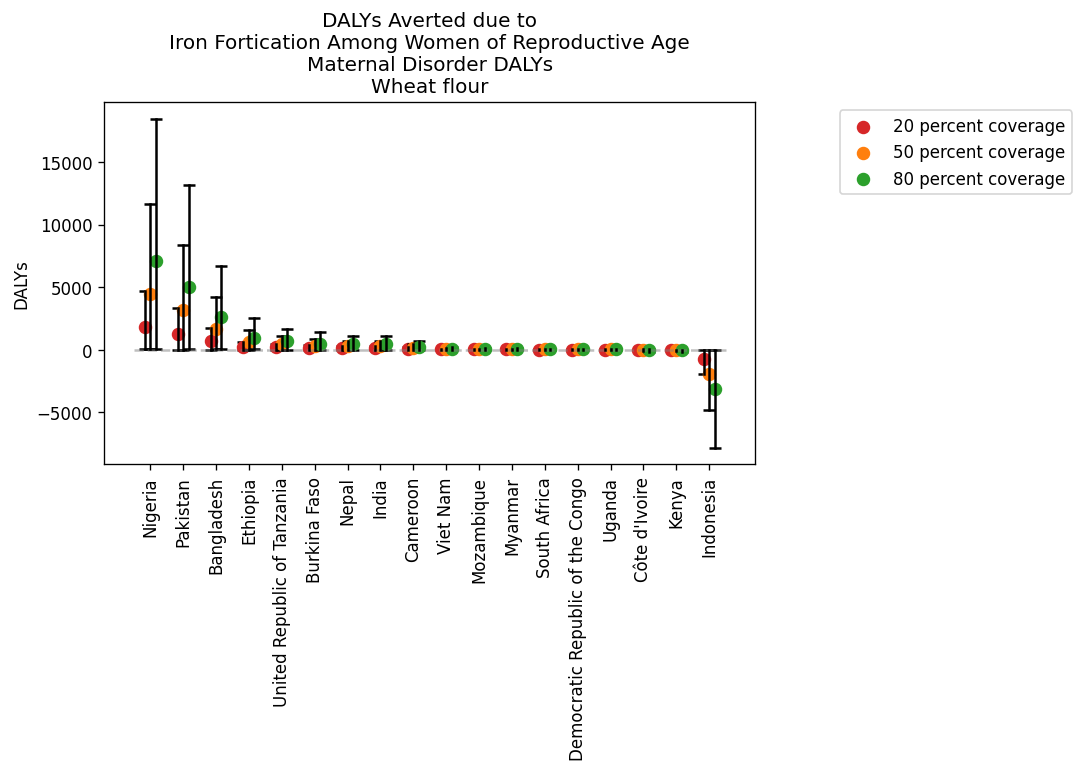

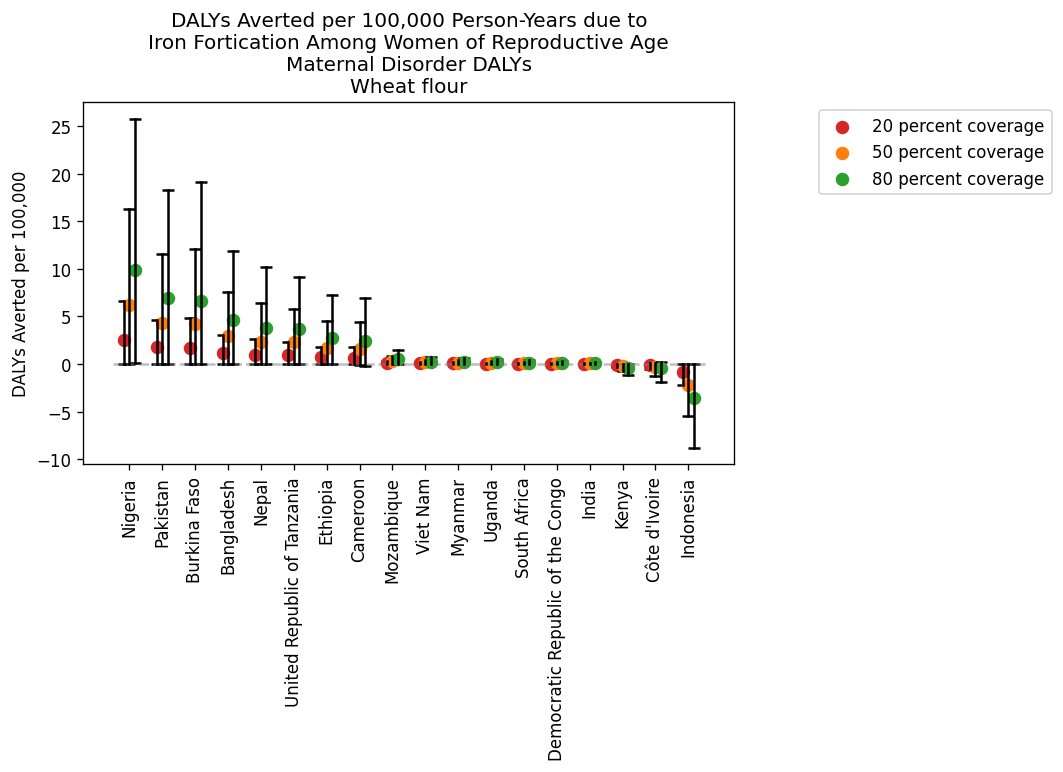

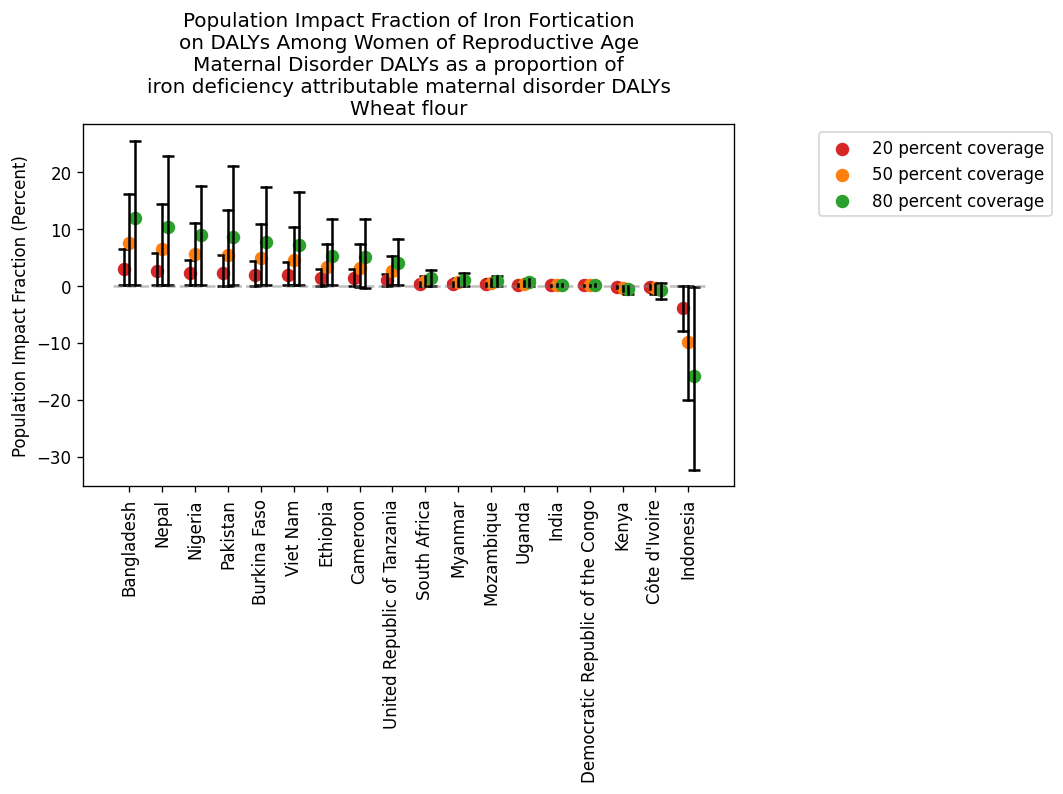

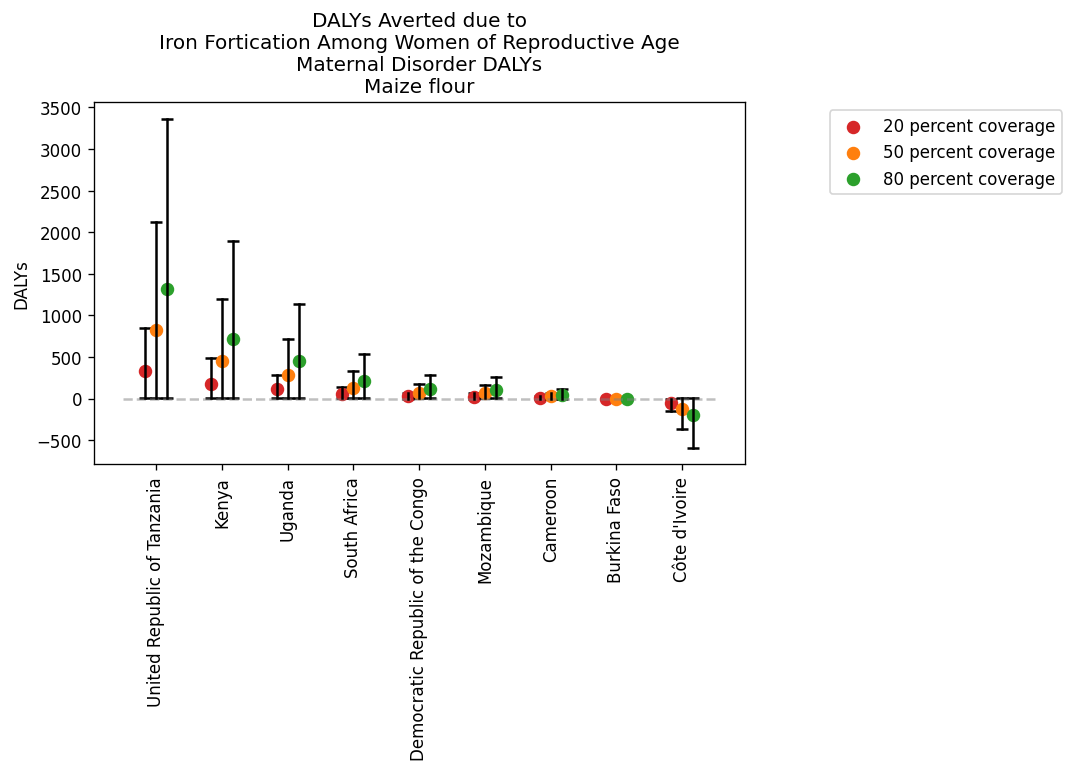

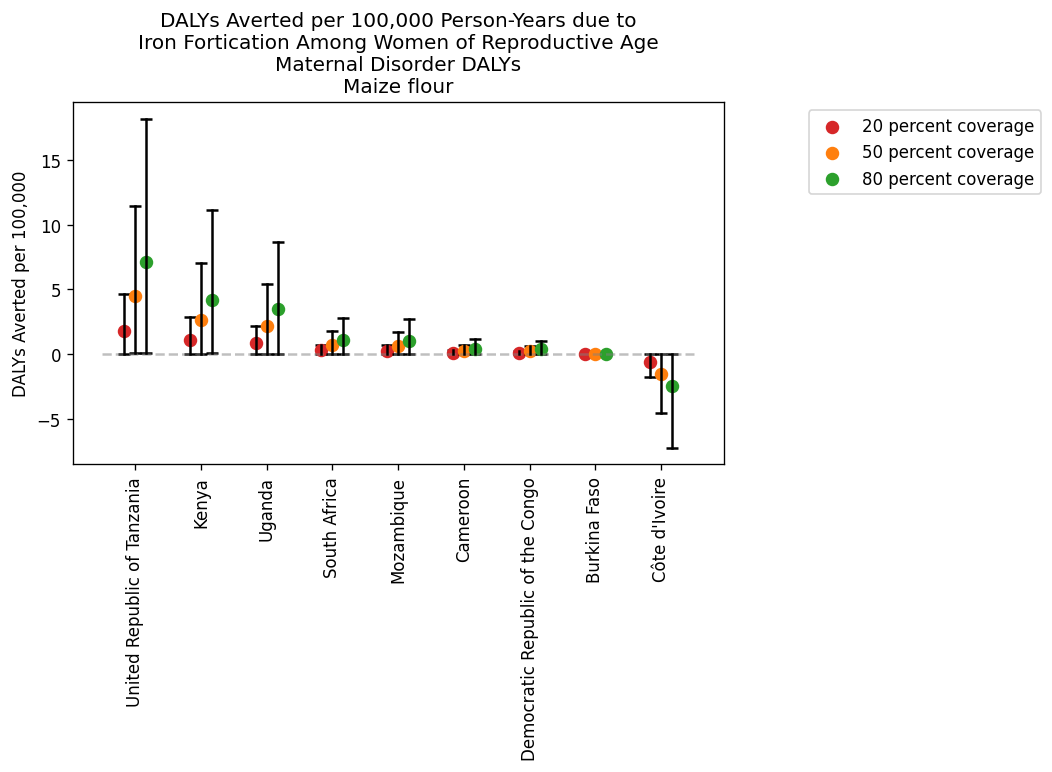

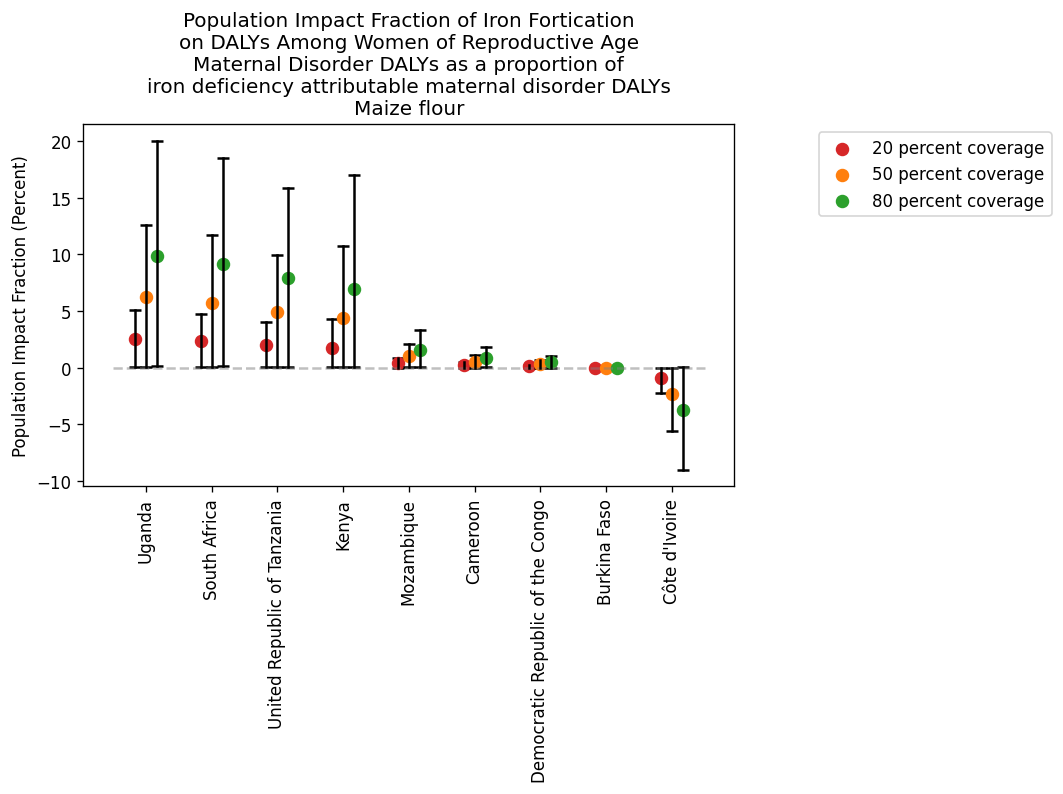

In [37]:
for vehicle in vehicles:
    make_dot_plots(
    (maternal_counts_averted.reset_index()
     .loc[maternal_counts_averted.reset_index().vehicle==vehicle]
     .set_index(['location_id','coverage_level','year'])
     .drop(columns='vehicle')), 
    'Iron', 
    'counts', 
    coverage_levels, f'Maternal Disorder DALYs\n{vehicle.capitalize()}', 
    f'iron_wra_maternal_disorder_counts_averted_{vehicle}', True)
    
    make_dot_plots(
    (maternal_rates_averted.reset_index()
     .loc[maternal_rates_averted.reset_index().vehicle==vehicle]
     .set_index(['location_id','coverage_level','year'])
     .drop(columns='vehicle')), 
    'Iron', 
    'rates', 
    coverage_levels, f'Maternal Disorder DALYs\n{vehicle.capitalize()}', 
    f'iron_wra_maternal_disorder_rates_averted_{vehicle}', True)

    make_dot_plots(
    (maternal_disorders_pif.reset_index()
     .loc[maternal_disorders_pif.reset_index().vehicle==vehicle]
     .set_index(['location_id','coverage_level','year'])
     .drop(columns='vehicle')), 
    'Iron', 
    'pifs', 
    coverage_levels, f'Maternal Disorder DALYs as a proportion of\niron deficiency attributable maternal disorder DALYs\n{vehicle.capitalize()}', 
    f'iron_wra_maternal_disorder_pif_{vehicle}', True)

# OVERALL

In [38]:
overall_counts_averted = anemia_counts_averted + maternal_counts_averted
overall_rates_averted = anemia_rates_averted + maternal_rates_averted
overall_counts_averted.head()

draw                                               draw_0        draw_1  \
location_id vehicle     coverage_level year                               
11          wheat flour 0.2            2021      0.000000      0.000000   
                                       2022  -8547.597911  -3436.836185   
                                       2023 -34681.716862 -13837.743411   
                                       2024 -34681.716862 -13837.743411   
                                       2025 -34681.716862 -13837.743411   

draw                                              draw_10     draw_100  \
location_id vehicle     coverage_level year                              
11          wheat flour 0.2            2021      0.000000     0.000000   
                                       2022  -2975.641637 -2366.340181   
                                       2023 -11972.164699 -9507.934516   
                                       2024 -11972.164699 -9507.934516   
                                       2025 -11972.164699 -9507.934516   

draw                                             draw_101      draw_102  \
location_id vehicle     coverage_level year                               
11          wheat flour 0.2            2021      0.000000      0.000000   
                                       2022  -4388.326929  -4795.275967   
                                       2023 -17716.589716 -19369.059110   
                                       2024 -17716.589716 -19369.059110   
                                       2025 -17716.589716 -19369.059110   

draw                                            draw_103      draw_104  \
location_id vehicle     coverage_level year                              
11          wheat flour 0.2            2021     0.000000      0.000000   
                                       2022  -937.825334  -5152.829228   
                                       2023 -3758.460182 -20844.259434   
                                       2024 -3758.460182 -20844.259434   
                                       2025 -3758.460182 -20844.259434   

draw                                             draw_105      draw_106  ...  \
location_id vehicle     coverage_level year                              ...   
11          wheat flour 0.2            2021      0.000000      0.000000  ...   
                                       2022  -3199.098978  -7440.492661  ...   
                                       2023 -12876.505927 -30201.412130  ...   
                                       2024 -12876.505927 -30201.412130  ...   
                                       2025 -12876.505927 -30201.412130  ...   

draw                                             draw_990      draw_991  \
location_id vehicle     coverage_level year                               
11          wheat flour 0.2            2021      0.000000      0.000000   
                                       2022  -3277.946194  -3448.851348   
                                       2023 -13223.036896 -13884.816442   
                                       2024 -13223.036896 -13884.816442   
                                       2025 -13223.036896 -13884.816442   

draw                                             draw_992      draw_993  \
location_id vehicle     coverage_level year                               
11          wheat flour 0.2            2021      0.000000      0.000000   
                                       2022  -5963.683343  -7567.121639   
                                       2023 -24164.102025 -30737.248791   
                                       2024 -24164.102025 -30737.248791   
                                       2025 -24164.102025 -30737.248791   

draw                                            draw_994     draw_995  \
location_id vehicle     coverage_level year                             
11          wheat flour 0.2            2021     0.000000      0.00000   
                                       2022 -2409.953118  -4170.43672   
     

In [39]:
overall_pif = overall_rates_averted / ((ira_ylds + iron_attributable_maternal_disorder_burden)) * 100
overall_pif.head()

draw                                           draw_0    draw_1   draw_10  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                                       2022 -1.183225 -0.564550 -0.616920   
                                       2023 -4.800912 -2.273048 -2.482108   
                                       2024 -4.800912 -2.273048 -2.482108   
                                       2025 -4.800912 -2.273048 -2.482108   

draw                                         draw_100  draw_101  draw_102  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                                       2022 -0.371748 -0.918306 -0.874510   
                                       2023 -1.493681 -3.707393 -3.532318   
                                       2024 -1.493681 -3.707393 -3.532318   
                                       2025 -1.493681 -3.707393 -3.532318   

draw                                         draw_103  draw_104  draw_105  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                                       2022 -0.151934 -1.095301 -0.484011   
                                       2023 -0.608898 -4.430719 -1.948163   
                                       2024 -0.608898 -4.430719 -1.948163   
                                       2025 -0.608898 -4.430719 -1.948163   

draw                                         draw_106  ...  draw_990  \
location_id vehicle     coverage_level year            ...             
11          wheat flour 0.2            2021  0.000000  ...  0.000000   
                                       2022 -1.794782  ... -0.802822   
                                       2023 -7.285128  ... -3.238535   
                                       2024 -7.285128  ... -3.238535   
                                       2025 -7.285128  ... -3.238535   

draw                                         draw_991  draw_992  draw_993  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                                       2022 -0.559333 -1.150375 -1.489506   
                                       2023 -2.251833 -4.661174 -6.050296   
                                       2024 -2.251833 -4.661174 -6.050296   
                                       2025 -2.251833 -4.661174 -6.050296   

draw                                         draw_994  draw_995  draw_996  \
location_id vehicle     coverage_level year                                 
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000   
                                       2022 -0.434638 -0.715443 -1.763976   
                                       2023 -1.746711 -2.885508 -7.125197   
                                       2024 -1.746711 -2.885508 -7.125197   
                                       2025 -1.746711 -2.885508 -7.125197   

draw                                         draw_997  draw_998  draw_999  
location_id vehicle     coverage_level year                                
11          wheat flour 0.2            2021  0.000000  0.000000  0.000000  
                                       2022 -0.672153 -0.562023 -0.475664  
                                       2023 -2.705847 -2.259705 -1.910742  
                                       2024 -2.705847 -2.259705 -1.910742  
                                       2025 -2.705847 -2.259705 -1.910742  

[5 rows x 1000 columns]

In [40]:
overall_pif['measure'] = 'pif'
overall_counts_averted['measure'] = 'counts_averted'
overall_rates_averted['measure'] = 'rates_averted'
iron_wra_results = pd.concat([overall_pif.reset_index(),
                         overall_counts_averted.reset_index(),
                         overall_rates_averted.reset_index()],
                        ignore_index=True)
iron_wra_results.to_pickle('results_raw/iron_wra.pkl')

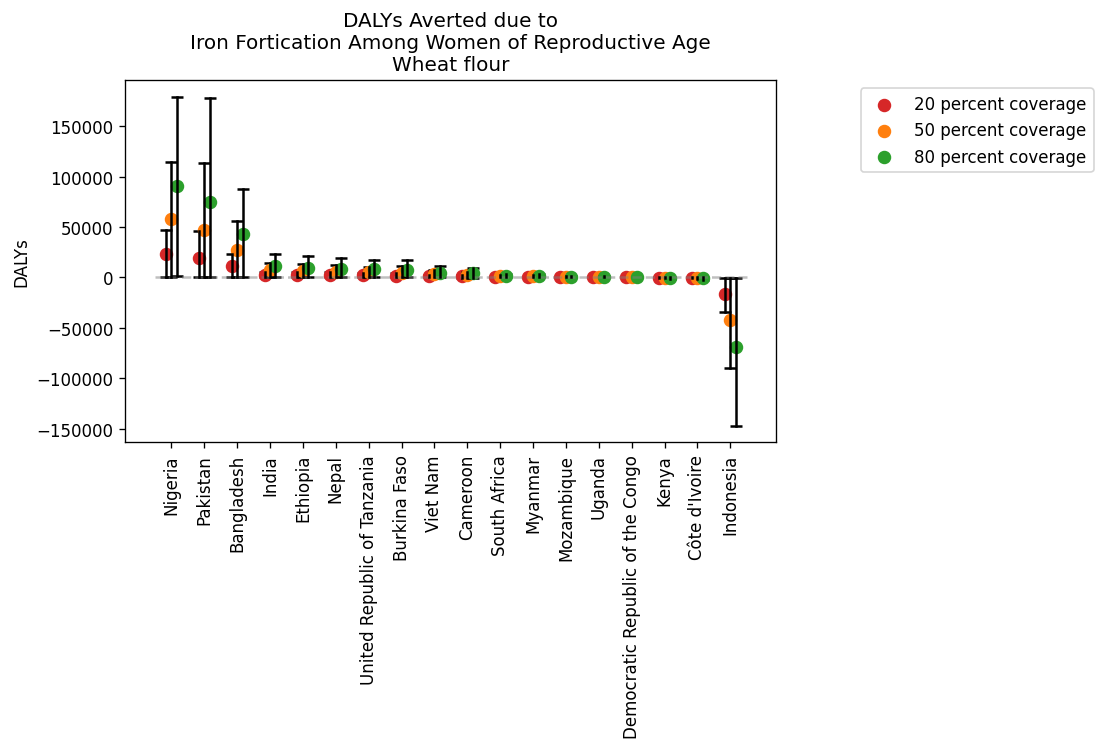

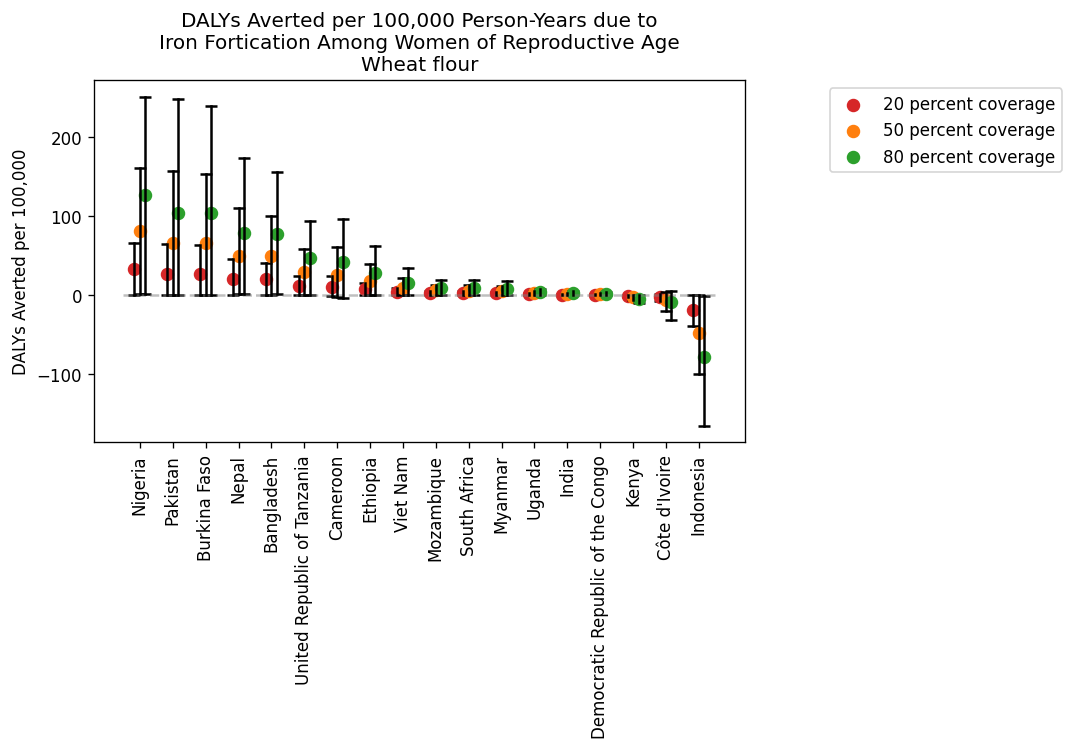

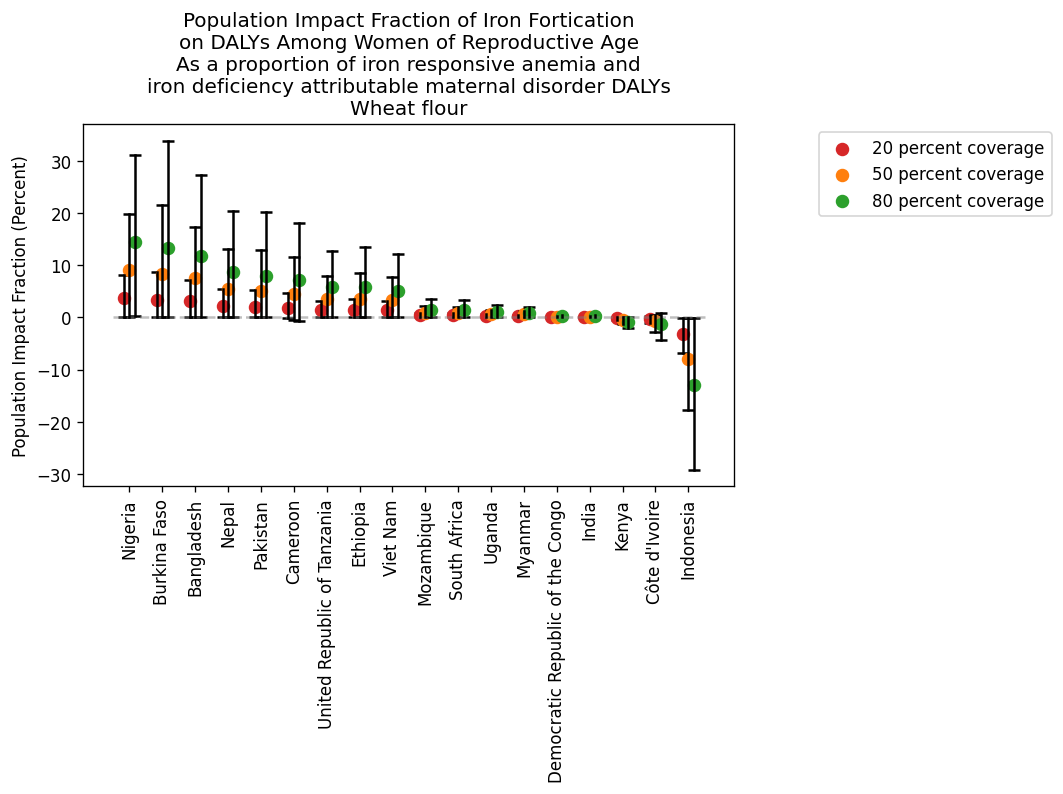

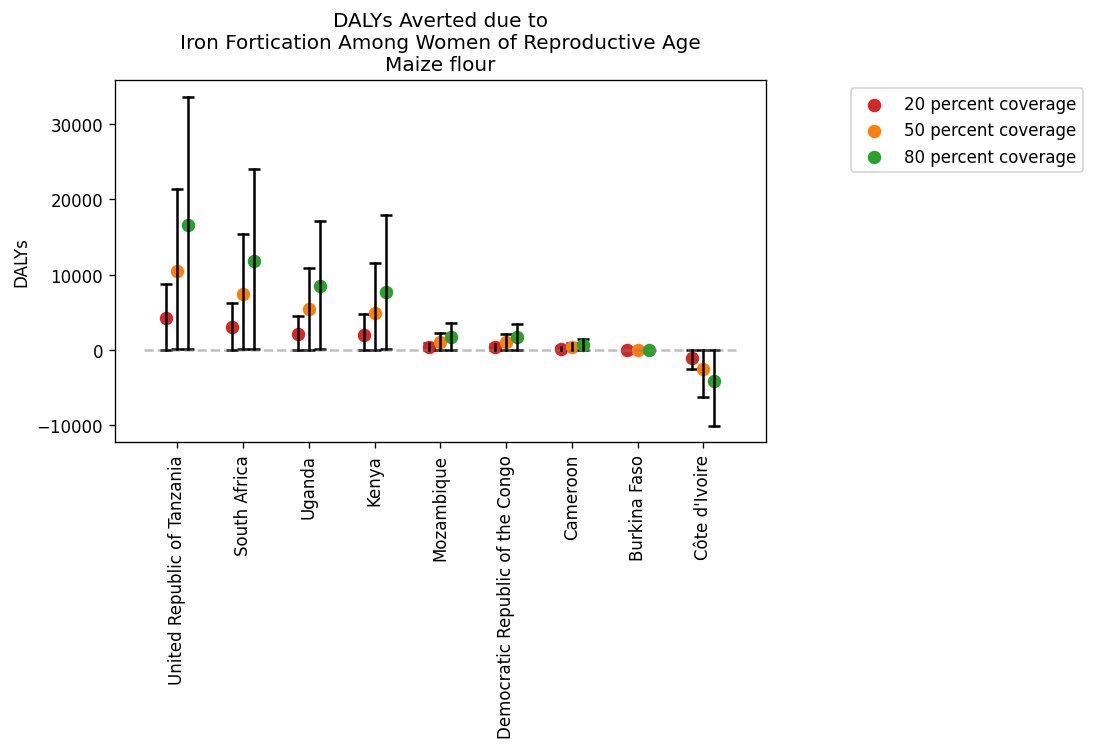

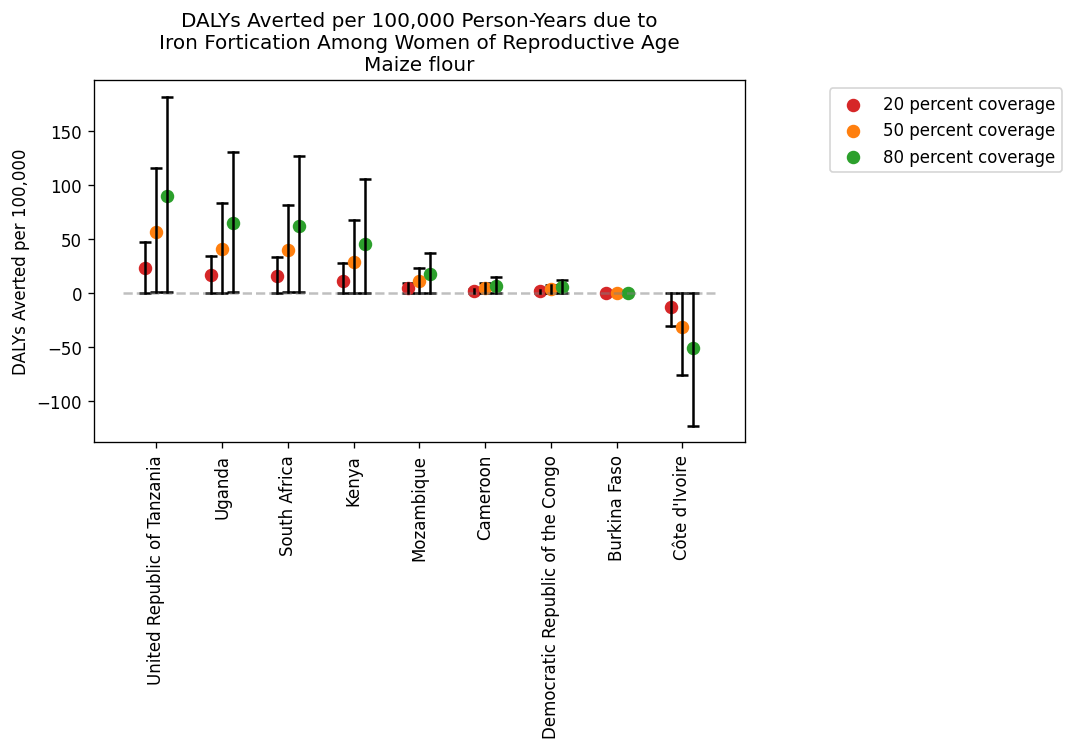

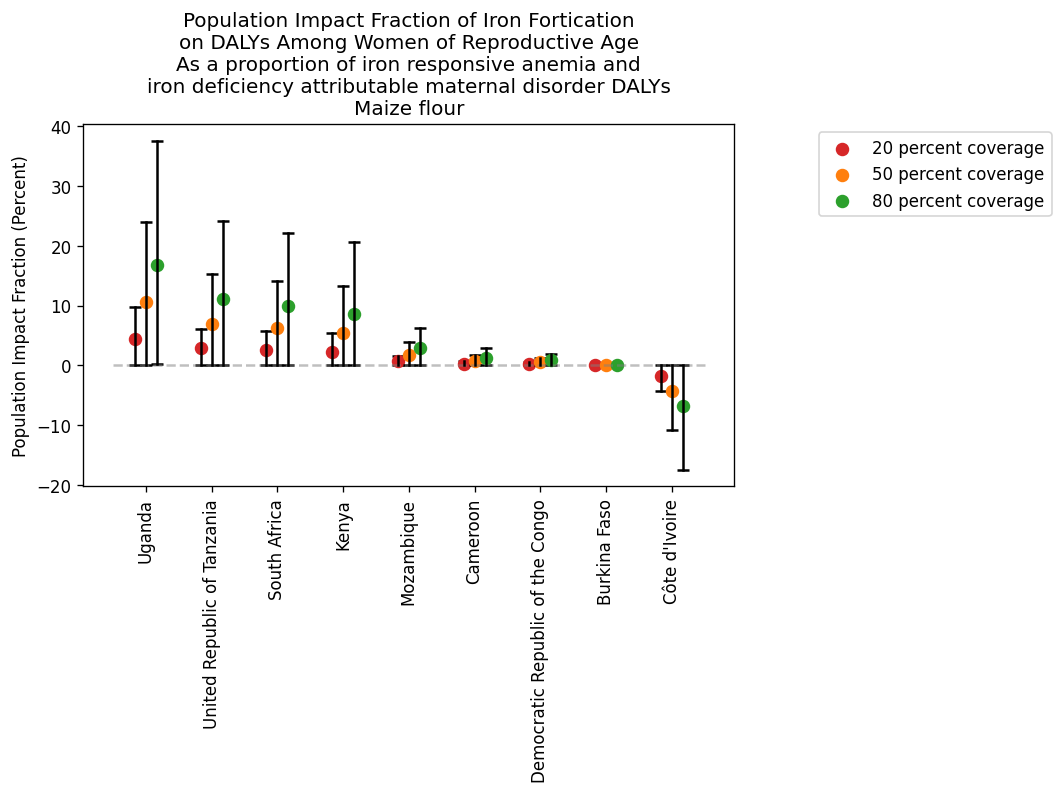

In [42]:
for vehicle in vehicles:
    
    make_dot_plots(
    (overall_counts_averted.reset_index()
     .loc[overall_counts_averted.reset_index().vehicle==vehicle]
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['vehicle','measure'])),
    'Iron', 
    'counts', 
    coverage_levels, 
    f'{vehicle.capitalize()}', 
    f'iron_wra_overall_counts_averted_{vehicle}',
    True)
    make_dot_plots(
    (overall_rates_averted.reset_index()
     .loc[overall_rates_averted.reset_index().vehicle==vehicle]
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['vehicle','measure'])),
    'Iron', 
    'rates',
    coverage_levels, 
    f'{vehicle.capitalize()}', 
    f'iron_wra_overall_rates_averted_{vehicle}',
    True)
    make_dot_plots(
    (overall_pif.reset_index()
     .loc[overall_pif.reset_index().vehicle==vehicle]
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['vehicle','measure'])),
    'Iron', 
    'pifs',
    coverage_levels, 
    f'As a proportion of iron responsive anemia and\niron deficiency attributable maternal disorder DALYs\n{vehicle.capitalize()}', 
    f'iron_wra_overall_pif_{vehicle}',
    True)